In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## functions
def removeOutliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    
    iqr = q3 - q1
    
    intervalo_sup = q3 + (1.5 * iqr)
    intervalo_inf = q1 - (1.5 * iqr)
    return intervalo_sup, intervalo_inf

# Importar base
---

In [3]:
df = pd.read_csv('../data/bootcamp-solicitacoescredito.csv')
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [4]:
df.isnull().sum() / df.shape[0]

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.166945
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.156469
dataAprovadoEmComite           0.937813
periodoBalanco                 0.472529
ativoCirculante                0.472529
passivoCirculante              0.472529
totalAtivo                     0.472529
totalPatrimonioLiquido         0.472529
endividamento                  0.472529
duplicatasAReceber             0.472529


# Primeiro passo: Visualizar as features
---

<AxesSubplot: title={'center': 'custos'}, xlabel='custos', ylabel='Count'>

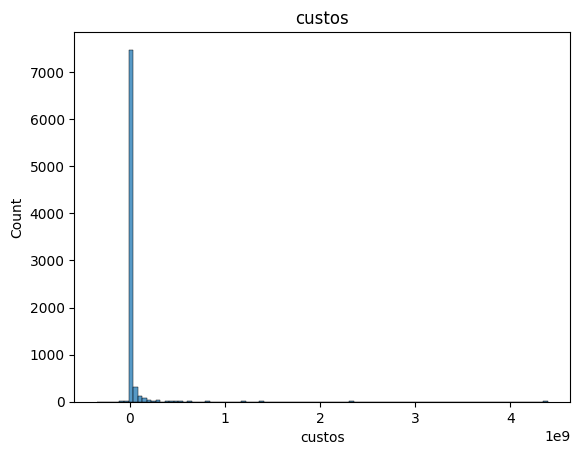

In [5]:
plt.title('custos')
sns.histplot(data=df, x='custos', bins=100)

<AxesSubplot: title={'center': 'total Ativo'}, xlabel='totalAtivo', ylabel='Count'>

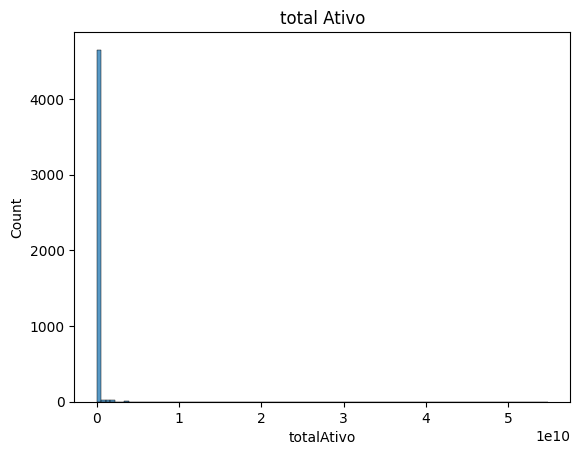

In [6]:
plt.title('total Ativo')
sns.histplot(data=df, x='totalAtivo', bins=100)

<AxesSubplot: title={'center': 'Ativo Circulante'}, xlabel='ativoCirculante', ylabel='Count'>

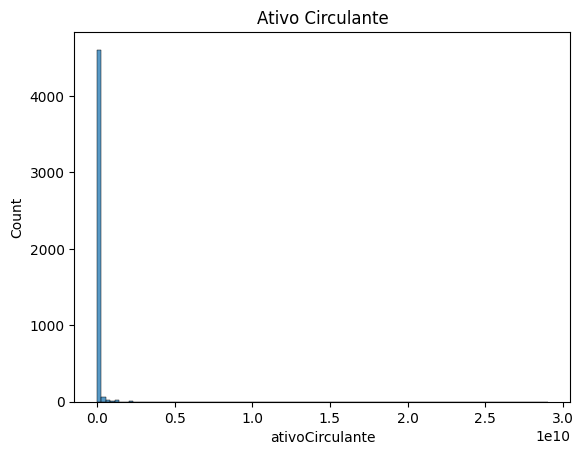

In [7]:
plt.title('Ativo Circulante')
sns.histplot(data=df, x='ativoCirculante', bins=100)

<AxesSubplot: title={'center': 'Passivo Circulante'}, xlabel='passivoCirculante', ylabel='Count'>

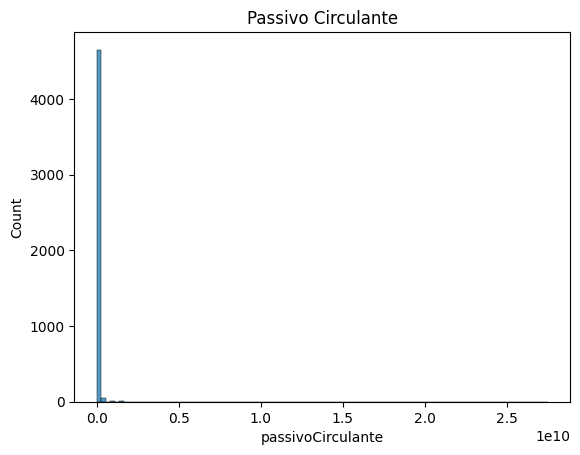

In [8]:
plt.title('Passivo Circulante')
sns.histplot(data=df, x='passivoCirculante', bins=100)

<AxesSubplot: title={'center': 'Margem Bruta Acumulada'}, xlabel='margemBrutaAcumulada', ylabel='Count'>

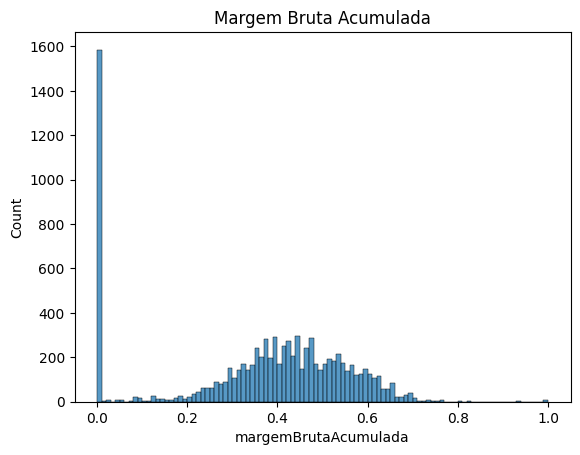

In [9]:
plt.title('Margem Bruta Acumulada')
sns.histplot(data=df, x='margemBrutaAcumulada', bins=100)

<AxesSubplot: title={'center': 'Maior Atraso'}, xlabel='maiorAtraso', ylabel='Count'>

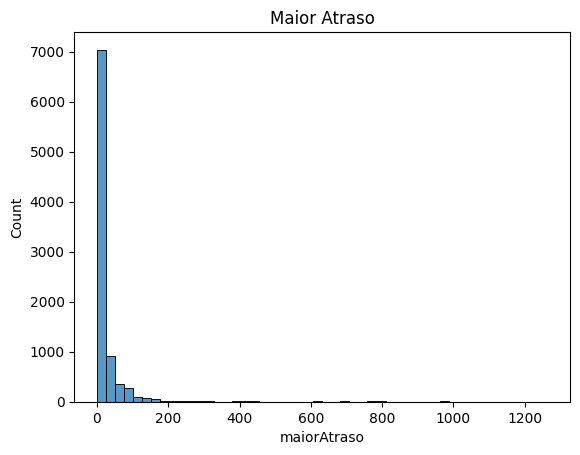

In [10]:
plt.title('Maior Atraso')
sns.histplot(data=df, x='maiorAtraso', bins=50)

<AxesSubplot: title={'center': 'Percentual Protestos'}, xlabel='percentualProtestos', ylabel='Count'>

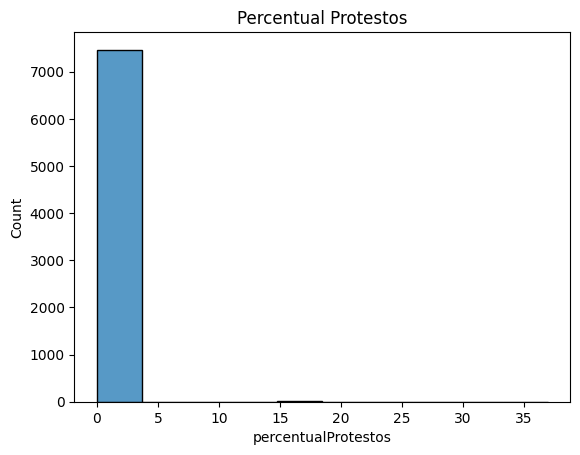

In [11]:
plt.title('Percentual Protestos')
sns.histplot(data=df, x='percentualProtestos', bins=10)

<AxesSubplot: title={'center': 'Prazo Médio Recebimento de Vendas'}, xlabel='prazoMedioRecebimentoVendas', ylabel='Count'>

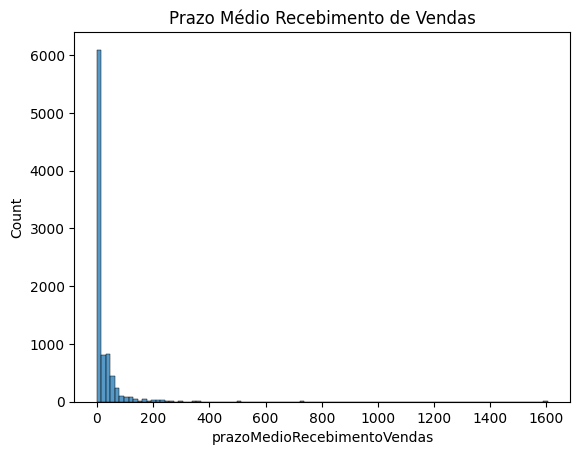

In [12]:
plt.title('Prazo Médio Recebimento de Vendas')
sns.histplot(data=df, x='prazoMedioRecebimentoVendas', bins=100)

<AxesSubplot: title={'center': 'Titulos em Aberto'}, xlabel='titulosEmAberto', ylabel='Count'>

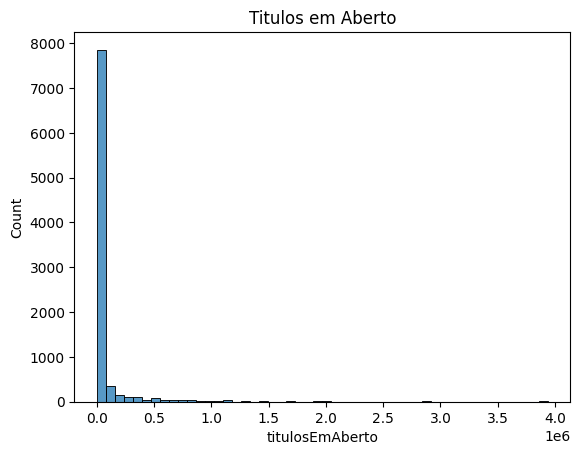

In [13]:
plt.title('Titulos em Aberto')
sns.histplot(data=df, x='titulosEmAberto', bins=50)

<AxesSubplot: title={'center': 'Diferença Percentual de Risco'}, xlabel='diferencaPercentualRisco', ylabel='Count'>

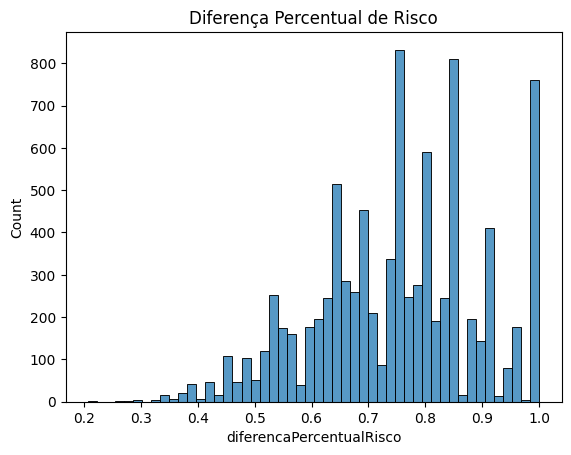

In [14]:
plt.title('Diferença Percentual de Risco')
sns.histplot(data=df, x='diferencaPercentualRisco', bins=50)

<AxesSubplot: title={'center': 'Percentual Risco'}, xlabel='percentualRisco', ylabel='Count'>

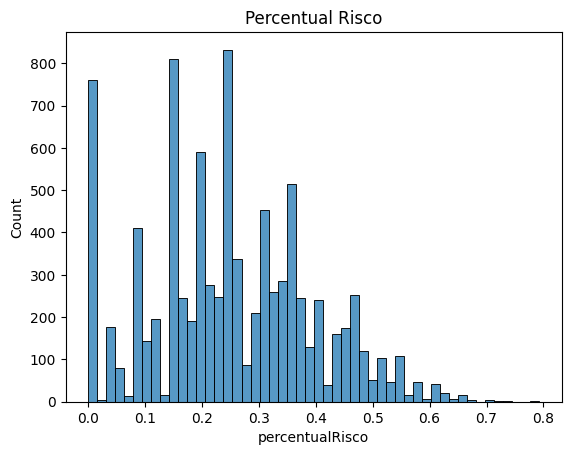

In [15]:
plt.title('Percentual Risco')
sns.histplot(data=df, x='percentualRisco', bins=50)

<AxesSubplot: title={'center': 'Dashboard Correlação'}, xlabel='dashboardCorrelacao', ylabel='Count'>

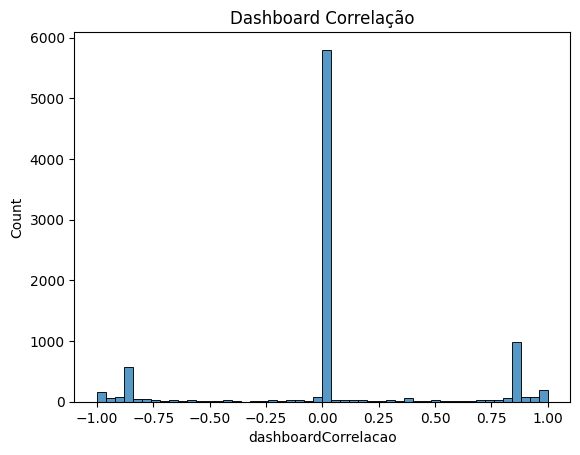

In [16]:
plt.title('Dashboard Correlação')
sns.histplot(data=df, x='dashboardCorrelacao', bins=50)

<AxesSubplot: title={'center': 'Ativo Circulante'}, xlabel='ativoCirculante', ylabel='Count'>

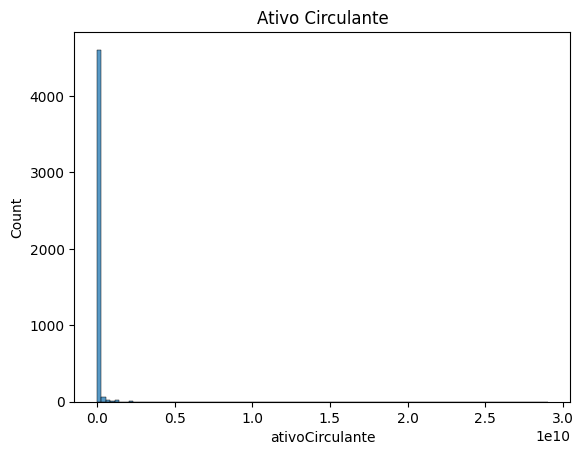

In [17]:
plt.title('Ativo Circulante')
sns.histplot(data=df, x='ativoCirculante', bins=100)

<AxesSubplot: title={'center': 'scorePontualidade'}, xlabel='scorePontualidade', ylabel='Count'>

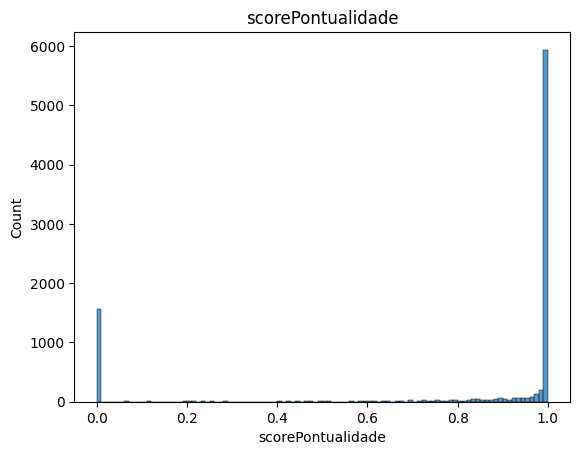

In [18]:
plt.title('scorePontualidade')
sns.histplot(data=df, x='scorePontualidade', bins=100)

## Correlação com patrimônio liquido
---

In [5]:
intervalo_sup, intervalo_inf = removeOutliers(df['totalPatrimonioLiquido'])
intervalo_sup_titulos, intervalo_inf_titulos = removeOutliers(df['titulosEmAberto'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['titulosEmAberto'] < intervalo_sup_titulos) & (df_plot['titulosEmAberto'] > intervalo_inf_titulos)].copy()

<AxesSubplot: xlabel='titulosEmAberto', ylabel='totalPatrimonioLiquido'>

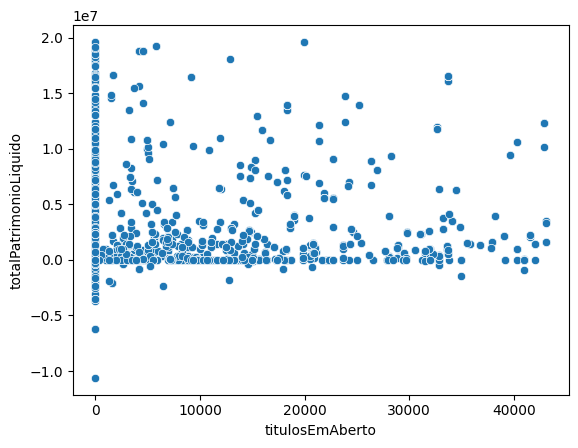

In [20]:
sns.scatterplot(data=df_plot, x='titulosEmAberto', y='totalPatrimonioLiquido')

In [21]:
intervalo_sup_valorSolicitado, intervalo_inf_valorSolicitado = removeOutliers(df['valorSolicitado'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['valorSolicitado'] < intervalo_sup_valorSolicitado) & (df_plot['valorSolicitado'] > intervalo_inf_valorSolicitado)].copy()

<AxesSubplot: xlabel='valorSolicitado', ylabel='totalPatrimonioLiquido'>

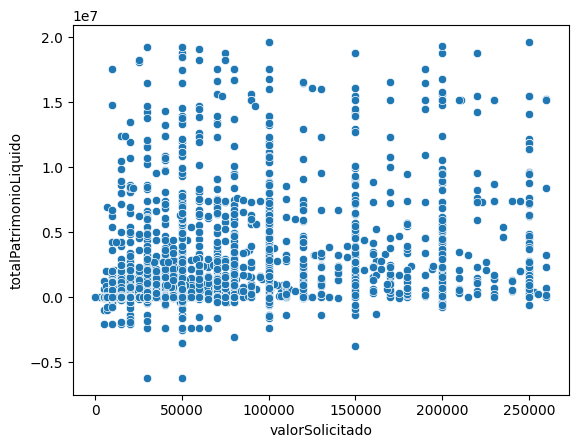

In [22]:
sns.scatterplot(data=df_plot, x='valorSolicitado', y='totalPatrimonioLiquido')

In [23]:
intervalo_sup_maiorAtraso, intervalo_inf_maiorAtraso = removeOutliers(df['maiorAtraso'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['maiorAtraso'] < intervalo_sup_maiorAtraso) & (df_plot['maiorAtraso'] > intervalo_inf_maiorAtraso)].copy()

<AxesSubplot: xlabel='maiorAtraso', ylabel='totalPatrimonioLiquido'>

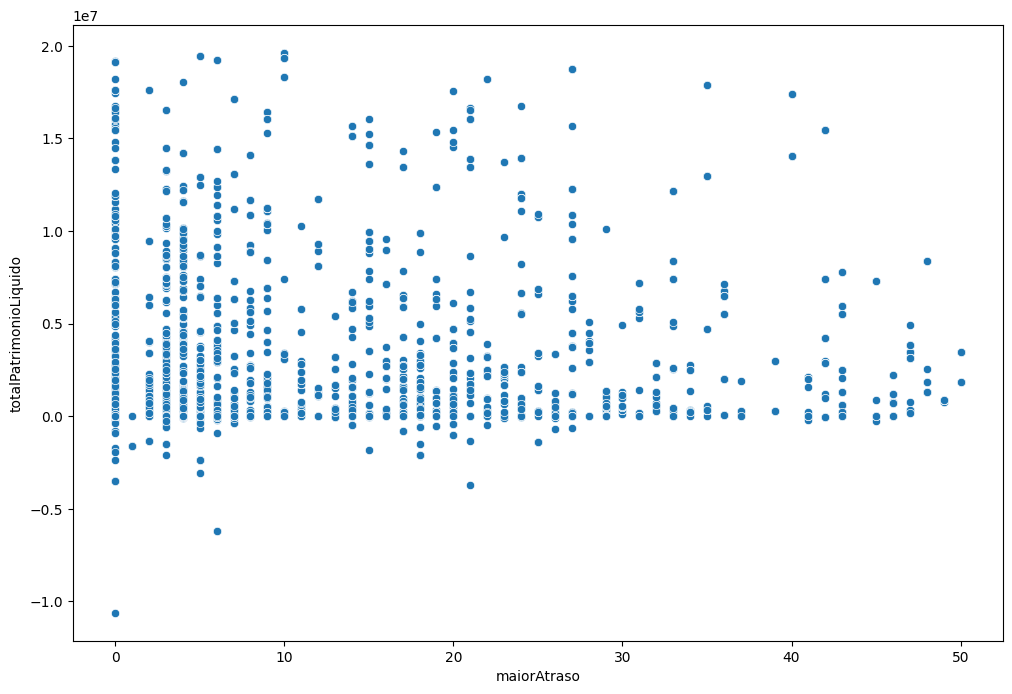

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='maiorAtraso', y='totalPatrimonioLiquido')

In [6]:
## Remoção de colunas com muitos nulos
df.drop(['dataAprovadoNivelAnalista',
         'dataAprovadoEmComite'], axis=1, inplace=True)

In [7]:
print(f"Quantidade de cnpjs COM nulos {df['cnpjSemTraco'].nunique()}")
print(f"Quantidade de cnpjs SEM nulos {df.dropna(subset=['totalAtivo', 'totalPatrimonioLiquido'])['cnpjSemTraco'].nunique()}")

Quantidade de cnpjs COM nulos 2829
Quantidade de cnpjs SEM nulos 1523


In [8]:
df_cluster = df[['totalAtivo', 'totalPatrimonioLiquido', 'ativoCirculante', 'passivoCirculante', 'endividamento', 'maiorAtraso', 'titulosEmAberto']].dropna().copy()
df_cluster

,totalAtivo,totalPatrimonioLiquido,ativoCirculante,passivoCirculante,endividamento,maiorAtraso,titulosEmAberto
4,25793410.0,14544378.0,14758917.0,12149031.0,3039112.0,20,1486.95
7,19415777.0,7519758.0,17801610.0,2538069.0,0.0,4,208980.00
8,39455945.0,25612746.0,36827690.0,13843198.0,0.0,43,6432.00
10,3609498.0,2538787.0,2127907.0,704245.0,366465.0,7,0.00
11,5595689.0,-720844.0,5369982.0,6118711.0,1715000.0,26,0.00
...,...,...,...,...,...,...,...
8958,20290799.0,1893943.0,20070708.0,18164050.0,74793.0,4,6804.00
8959,5633038.0,905806.0,4943835.0,4025065.0,1257000.0,18,90290.90
8960,0.0,0.0,0.0,0.0,0.0,0,0.00
8961,40876769.0,25603650.0,38305921.0,15063464.0,46198.0,64,1276462.66


<AxesSubplot: >

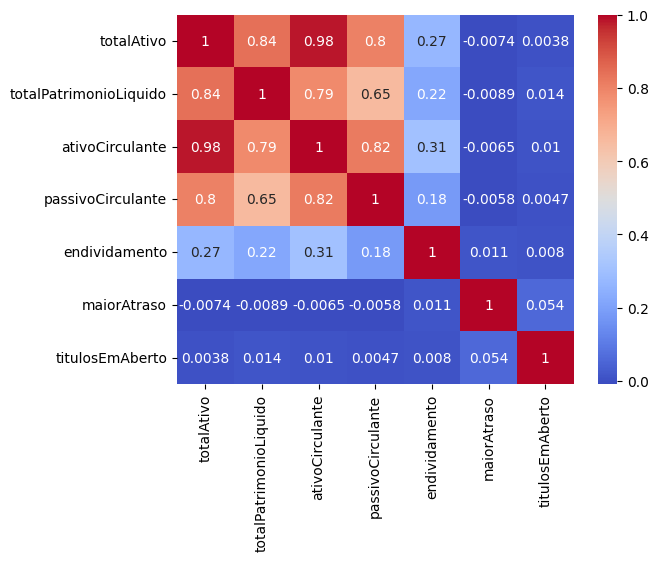

In [28]:
sns.heatmap(df_cluster.corr(), cmap='coolwarm', annot=True)

## Analisando variáveis correlacionadas
- O objetivo é conseguir as features que descriminem melhor variáveis como totalAtivo, totalPatrimonioLiquido, para conseguir seguimentar os grupos com o máximo de registros
---

In [29]:
df.columns

Index(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'cnpjSemTraco',
       'maiorAtraso', 'margemBrutaAcumulada', 'percentualProtestos',
       'primeiraCompra', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'definicaoRisco',
       'diferencaPercentualRisco', 'percentualRisco', 'dashboardCorrelacao',
       'valorAprovado', 'periodoBalanco', 'ativoCirculante',
       'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido',
       'endividamento', 'duplicatasAReceber', 'estoque', 'faturamentoBruto',
       'margemBruta', 'periodoDemonstrativoEmMeses', 'custos', 'anoFundacao',
       'intervaloFundacao', 'capitalSocial', 'restricoes', 'empresa_MeEppMei',
       'scorePontualidade', 'limiteEmpresaAnaliseCredito'],
      dtype='object')

In [30]:
df.isnull().sum() / df.shape[0]

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.166945
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.156469
periodoBalanco                 0.472529
ativoCirculante                0.472529
passivoCirculante              0.472529
totalAtivo                     0.472529
totalPatrimonioLiquido         0.472529
endividamento                  0.472529
duplicatasAReceber             0.472529
estoque                        0.472529


In [9]:
import numpy as np
df['intervaloFundacao'] = df['intervaloFundacao'].map({'De 0 a 5 anos': 0, 'De 6 a 10 anos': 1, 'De 11 a 16 anos': 2, 'Acima de 17 anos': 3})

<AxesSubplot: >

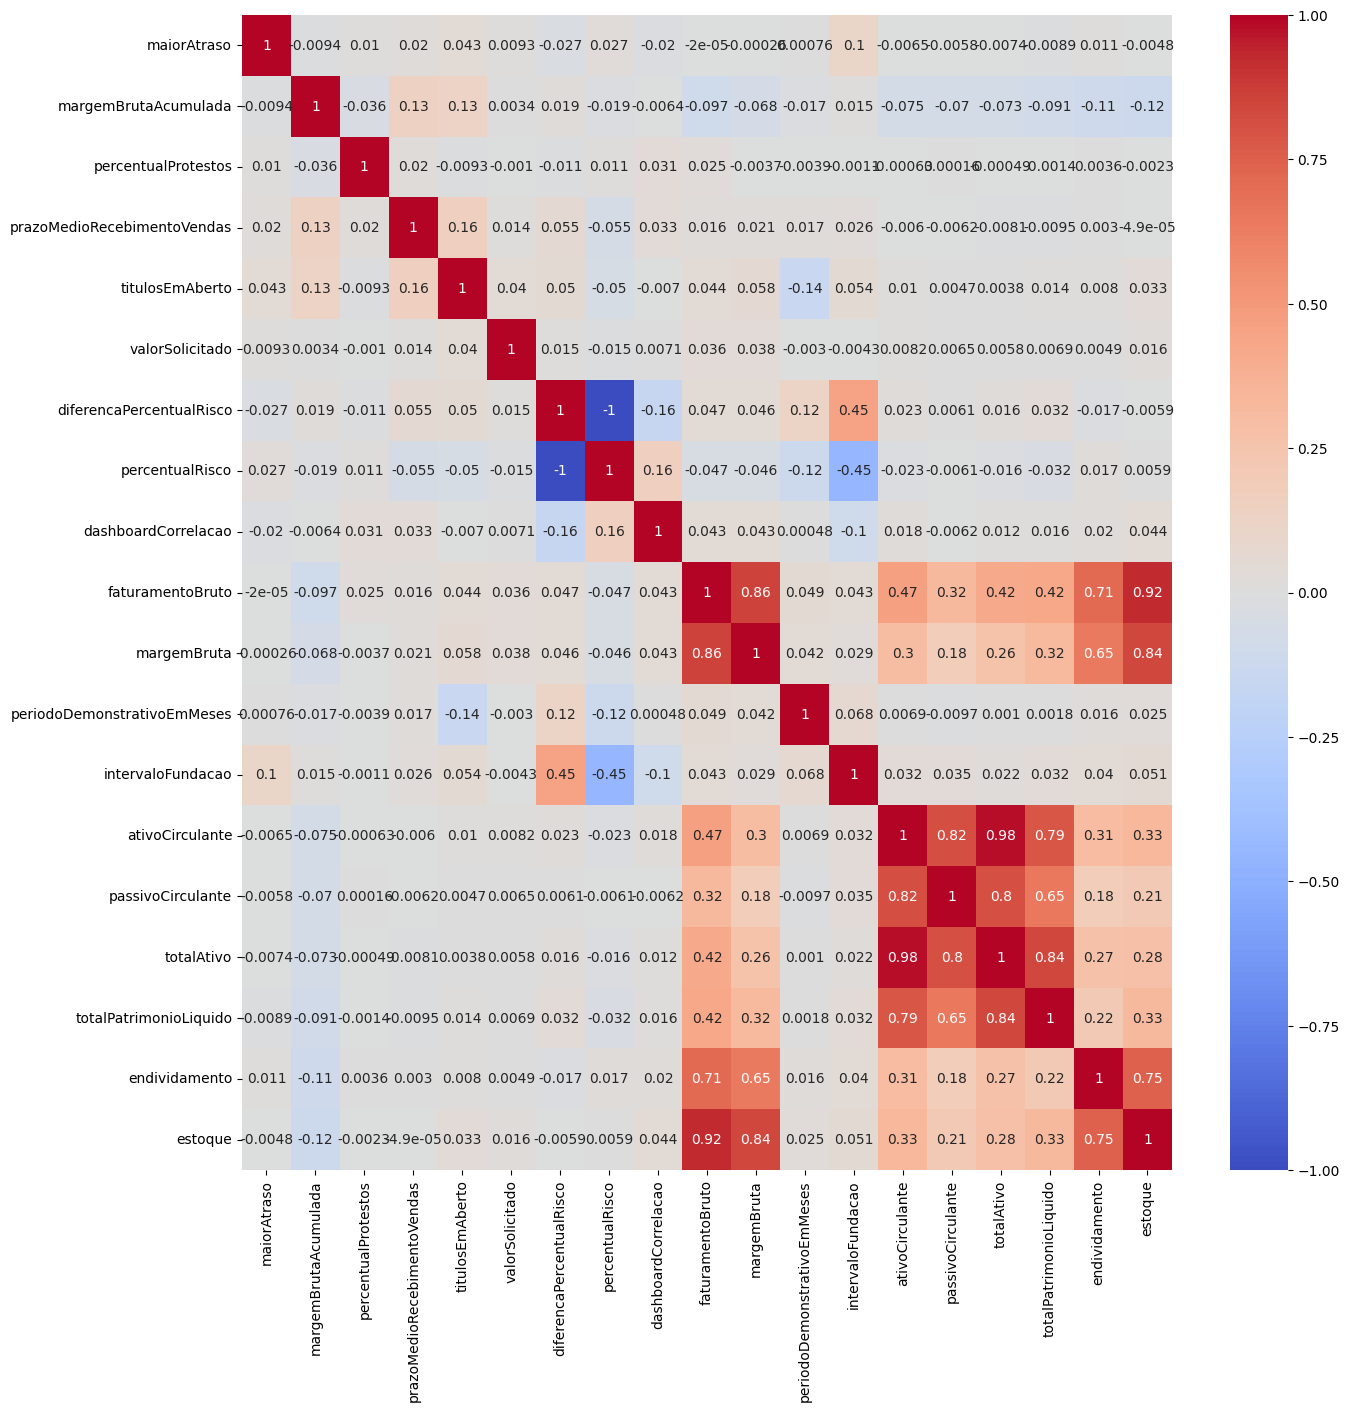

In [32]:
correlation_features = ['maiorAtraso', 'margemBrutaAcumulada',
                        'percentualProtestos', 'prazoMedioRecebimentoVendas',
                        'titulosEmAberto', 'valorSolicitado',
                        'diferencaPercentualRisco', 'percentualRisco',
                        'dashboardCorrelacao', 'faturamentoBruto',
                        'margemBruta', 'periodoDemonstrativoEmMeses',
                        'intervaloFundacao','periodoBalanco',
                        'ativoCirculante','passivoCirculante',
                        'totalAtivo','totalPatrimonioLiquido',
                        'endividamento', 'estoque']

df_corr = df[correlation_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

In [10]:
## Removendo outliers das colunas que me interessam
# ['margemBrutaAcumulada', 'faturamentoBruto', 'margemBruta'] -> Até então essas 3 colunas parecem interessantes
# Minha hipótese é que se eu usar variáveis correlacionadas com o totalAtivo, endividamento, estoque, etc... Conseguirei 
# Features que descriminam bem os grupos ($$)

features_of_interest = ['ativoCirculante','passivoCirculante',
                        'totalAtivo','totalPatrimonioLiquido',
                        'endividamento', 'estoque']

dict_limits = {}

for col in features_of_interest:
    limits = removeOutliers(df[col])
    dict_limits[col] = limits

print(dict_limits)

df_correlation = df.copy()
for key, value in dict_limits.items():
    df_correlation = df_correlation[(df_correlation[key] < value[0]) & (df_correlation[key] > value[1])]

{'ativoCirculante': (39546537.5, -22307786.5), 'passivoCirculante': (18348960.0, -10716624.0), 'totalAtivo': (46343995.0, -26126813.0), 'totalPatrimonioLiquido': (19742964.5, -11473151.5), 'endividamento': (1854125.0, -1112475.0), 'estoque': (13477668.5, -7812543.5)}


<AxesSubplot: >

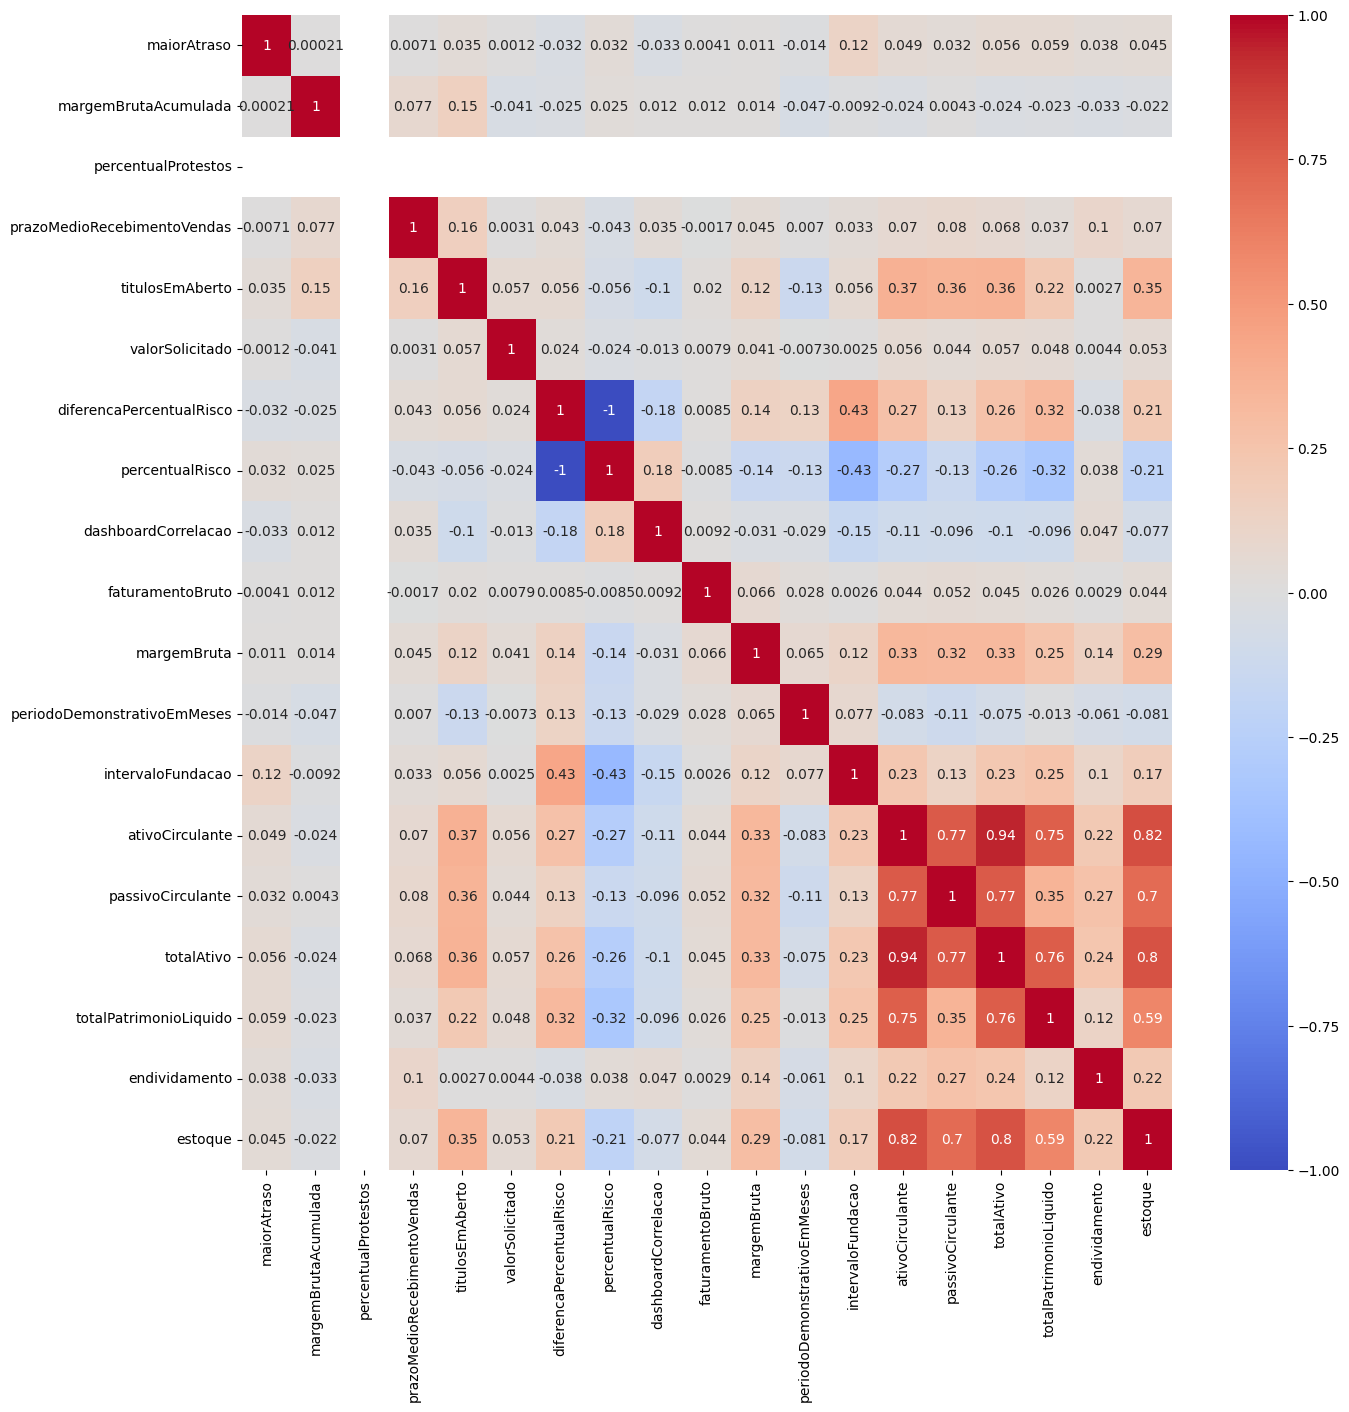

In [34]:
df_corr_v2 = df_correlation[correlation_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr_v2, cmap='coolwarm', annot=True)

## Teste de quantidade de clusters
---

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
df_cluster = df[['cnpjSemTraco',
                 'numero_solicitacao',
                 'margemBrutaAcumulada',
                 'faturamentoBruto',
                 'margemBruta',
                 'percentualRisco',
                 'percentualRisco',
                 'intervaloFundacao']].dropna()

df_cluster_v2 = se.fit_transform(df_cluster.drop(['cnpjSemTraco', 'numero_solicitacao'], axis=1))
# SALVAR OS NUMEROS REFERENTES A INERCIA E SILHUETA DO MODELO

inercia = []
silhueta = {}

for i in range(2, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_cluster_v2)
    
    inercia.append(k_means.inertia_)
    
    silhueta[i] = silhouette_score(df_cluster_v2, labels=k_means.labels_, metric='euclidean')

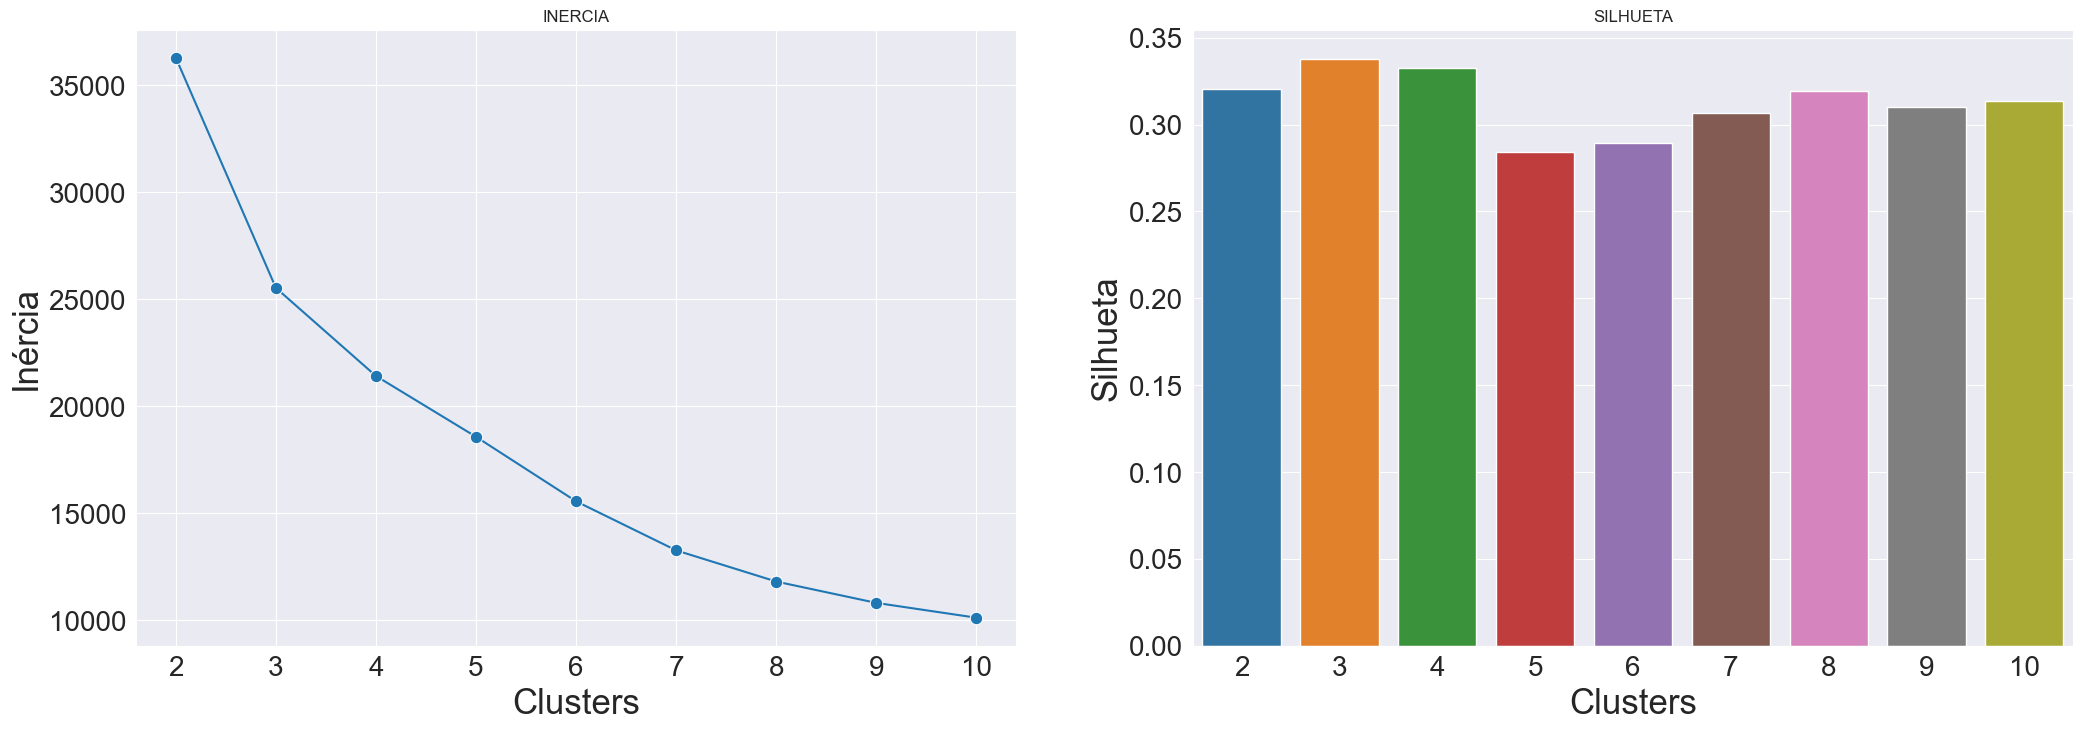

In [12]:
plt.figure(figsize=(25, 8))
sns.set_style("darkgrid")

plt.subplot(1, 2, 1)
plt.title('INERCIA')
sns.lineplot(x=range(2, 11), y=inercia, marker='o', markersize=9)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Inércia', fontsize=25)

plt.subplot(1, 2, 2)
plt.title('SILHUETA')
sns.barplot(x=list(silhueta.keys()), y=list(silhueta.values()))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Silhueta', fontsize=25)

plt.show()

## UTILIZAREI 3 CLUSTERS

In [13]:
k_means = KMeans(n_clusters=3, random_state=42)
preds = k_means.fit_predict(df_cluster_v2)

df_cluster['group'] = preds
df_cluster

,cnpjSemTraco,numero_solicitacao,margemBrutaAcumulada,faturamentoBruto,margemBruta,percentualRisco,percentualRisco,intervaloFundacao,group
0,KEBE17609492220843,1,0.252448,1766880.0,0.0,0.283019,0.283019,3.0,0
2,GCVQ28531614261293,3,0.624777,2814940.0,0.0,0.283019,0.283019,1.0,1
3,KJND32266018316396,4,0.000000,1285274.0,0.0,0.603774,0.603774,1.0,1
4,CGQN15826802440348,5,0.454088,40779757.0,81459809.0,0.169811,0.169811,3.0,0
5,KAYS53232027306925,6,0.000000,918476.0,0.0,0.377358,0.377358,1.0,1
...,...,...,...,...,...,...,...,...,...
8958,XIIJ66670040144884,9031,0.536739,133280394.0,44612644.0,0.250000,0.250000,2.0,0
8959,JXCH36268697453955,9032,0.374573,4887005.0,2322234.0,0.142857,0.142857,2.0,0
8960,IPFS70635894073808,9033,0.462250,5392166.0,246578.0,0.267857,0.267857,0.0,1
8961,IFOK15843566708440,9034,0.426652,119702196.0,38587967.0,0.142857,0.142857,3.0,0


In [14]:
df_cluster['group'].value_counts()

0    4764
1    3397
2      62
Name: group, dtype: int64

In [15]:
df.shape

(8973, 36)

In [16]:
df_cluster_merge = df_cluster[['cnpjSemTraco', 'numero_solicitacao', 'group']].reset_index(drop=True)

In [17]:
df_groups = df.merge(df_cluster_merge, on=['cnpjSemTraco', 'numero_solicitacao'])
df_groups.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,group
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,3.0,90000.0,False,True,1.0,43200.0,0
1,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,1.0,20000.0,False,True,1.0,4320.0,1
2,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,1.0,30000.0,False,True,0.0,5920.0,1
3,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,3.0,75000.0,False,False,1.0,89000.0,0
4,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.000000,NaN,2019-06-28T10:25:57,0,0.00,...,12.0,0.0,2011.0,1.0,15000.0,False,True,0.0,38400.0,1


In [18]:
df_groups.groupby('group').agg({'ativoCirculante': np.median,
                                'passivoCirculante': np.median,
                                'totalPatrimonioLiquido': np.median,
                                'totalAtivo': np.median,
                                'endividamento': np.median,
                                'estoque': np.median})

,ativoCirculante,passivoCirculante,totalPatrimonioLiquido,totalAtivo,endividamento,estoque
group,,,,,,
0,6.563632e+06,1878599.0,2725460.0,7.602796e+06,0.0,1754461.0
1,1.407528e+06,551497.5,337687.5,1.615900e+06,1500.0,364757.0
2,1.118886e+09,535065853.0,800377000.0,1.768742e+09,65648000.0,506297202.0


In [19]:
df_groups['group'] = df_groups['group'].map({0: 'medio', 1: 'pequeno', 2: 'grande'})

# Explorando os grupos agora
## Grupo dos pequenos
---

In [20]:
group_s = df_groups[df_groups['group'] == 'pequeno'].copy()

group_s.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,3397.000000,3397.000000,3397.000000,2802.000000,3397.000000,3.397000e+03,3.397000e+03,3397.000000,3397.000000,3397.000000,...,1.474000e+03,3.397000e+03,3.397000e+03,3397.000000,3.397000e+03,3397.000000,3397.000000,3.397000e+03,3397.000000,3.397000e+03
mean,4142.626729,23.982926,0.355940,0.026196,20.499264,4.141273e+04,1.844466e+05,0.605425,0.394575,0.137124,...,4.321163e+06,1.460161e+07,3.291279e+06,9.996762,5.487676e+06,2012.647336,0.750662,8.809647e+06,0.787160,1.494770e+06
std,2638.847110,64.548101,0.202933,0.774960,82.630454,2.120806e+05,2.270296e+06,0.090798,0.090798,0.503679,...,2.216980e+07,7.287778e+07,2.868195e+07,3.625138,3.600050e+07,7.595941,1.002913,8.370583e+07,0.383319,1.298989e+07
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.500000e+03,0.207547,0.232143,-0.999990,...,0.000000e+00,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1942.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1718.000000,3.000000,0.272732,0.000000,0.000000,0.000000e+00,2.000000e+04,0.547170,0.339286,0.000000,...,1.550925e+04,5.329260e+05,0.000000e+00,9.000000,0.000000e+00,2010.000000,0.000000,4.000000e+04,0.830644,3.960000e+03
50%,4063.000000,7.000000,0.401689,0.000000,0.000000,0.000000e+00,3.000000e+04,0.622642,0.377358,0.000000,...,3.647570e+05,1.428476e+06,0.000000e+00,12.000000,0.000000e+00,2015.000000,0.000000,1.000000e+05,1.000000,1.280000e+04
75%,6382.000000,22.000000,0.501292,0.000000,21.000000,9.222000e+03,5.000000e+04,0.660714,0.452830,0.490107,...,1.672073e+06,4.475279e+06,3.852140e+05,12.000000,3.605210e+05,2017.000000,1.000000,2.000000e+05,1.000000,6.020000e+04
max,9033.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.287000e+08,0.767857,0.792453,0.999990,...,7.005410e+08,1.163121e+09,6.715750e+08,12.000000,8.148238e+08,2020.000000,3.000000,1.342240e+09,1.000000,2.867581e+08


In [21]:
percentage_of_nulls = group_s.isnull().sum() / group_s.shape[0]
percentage_of_nulls

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.175155
primeiraCompra                 0.010598
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.123050
periodoBalanco                 0.566088
ativoCirculante                0.566088
passivoCirculante              0.566088
totalAtivo                     0.566088
totalPatrimonioLiquido         0.566088
endividamento                  0.566088
duplicatasAReceber             0.566088
estoque                        0.566088


In [22]:
def drop_columns_with_many_nulls(df):
    '''
    Colunas com mais de 30% de dados faltantes = drop
    df -> dataframe para ser ajustado
    '''
    percentage_of_nulls = df.isnull().sum() / df.shape[0]
    columns_to_drop = np.array(percentage_of_nulls[percentage_of_nulls > .3].index)
    adjusted_dataframe = df.drop(columns_to_drop, axis=1)
    return adjusted_dataframe

def initial_column_selection(df):
    '''
    ``Helper function``
    Dropa colunas que não serão utilizadas
    '''
    adjusted_df = drop_columns_with_many_nulls(df)
    
    ## Também não quero utilizar datas na minha regressão
    unused_columns = ['primeiraCompra']
    
    # Também não quero colunas que identifiquem o cliente, quero trata-los como um ponto único
    unused_columns = np.concatenate(
        (
            unused_columns, 
            np.array(['numero_solicitacao', 'cnpjSemTraco', 'nomeFantasia', 'razaoSocial', 'status'])
        )
    )
    
    return adjusted_df.drop(unused_columns, axis=1)

def plota_histograma(df, column_to_plot, title, log=False):
    if log == True: 
        column_to_plot = np.log(df[column_to_plot] + 1)
    
    sns.histplot(data=df, x=column_to_plot)
    plt.title(title, fontdict={'fontsize': 16})
    
def create_subplots(df, column, title, figuresize=(15,6)):
    df = df.dropna()
    
    title_log = title + ' - LOG'
    
    plt.figure(figsize=figuresize)
    plt.subplot(1, 2, 1)
    plota_histograma(df, column, title)
    
    plt.subplot(1, 2, 2)
    plota_histograma(df, column, title_log, True)

In [23]:
group_s_v2 = initial_column_selection(group_s)

In [24]:
group_s_v2['empresa_MeEppMei'].value_counts()

True     2185
False    1212
Name: empresa_MeEppMei, dtype: int64

In [25]:
group_s_v2.select_dtypes('object').isnull().sum()

definicaoRisco      0
restricoes          0
empresa_MeEppMei    0
group               0
dtype: int64

## Categorizando e transformando colunas

In [26]:
mapper_risk = {key: value for value, key in enumerate(group_s_v2['definicaoRisco'].unique())}

group_s_v2['definicaoRisco'] = group_s_v2['definicaoRisco'].map(mapper_risk)
group_s_v2['restricoes'] = np.int8(group_s_v2['restricoes'])
group_s_v2['empresa_MeEppMei'] = np.int8(group_s_v2['empresa_MeEppMei'])
group_s_v2['anoFundacao_cat'] = pd.cut(group_s_v2['anoFundacao'], bins=4, labels=[0, 1, 2, 3])
group_s_v2['anoFundacao_cat'] = np.int8(group_s_v2['anoFundacao_cat'])
group_s_v2.head()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,group,anoFundacao_cat
1,4,0.624777,0.0,0,0.0,20000.0,0,0.716981,0.283019,0.000000,...,0.0,2014.0,1.0,20000.0,0,1,1.0,4320.0,pequeno,3
2,20,0.000000,NaN,0,0.0,25000.0,1,0.396226,0.603774,0.485811,...,0.0,2013.0,1.0,30000.0,0,1,0.0,5920.0,pequeno,3
4,0,0.000000,NaN,0,0.0,25000.0,2,0.622642,0.377358,0.000000,...,0.0,2011.0,1.0,15000.0,0,1,0.0,38400.0,pequeno,3
5,16,0.000000,NaN,0,0.0,100000.0,2,0.584906,0.415094,-0.997517,...,156394112.0,1982.0,3.0,30515674.0,1,0,0.0,18132588.0,pequeno,2
8,7,0.000000,NaN,0,0.0,1000000.0,2,0.603774,0.396226,-0.509152,...,-3299332.0,2011.0,1.0,20000.0,0,1,0.0,81000.0,pequeno,3


In [27]:
group_s_v2.isnull().sum() / group_s_v2.shape[0]

maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.175155
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.123050
faturamentoBruto               0.000000
margemBruta                    0.000000
periodoDemonstrativoEmMeses    0.000000
custos                         0.000000
anoFundacao                    0.000000
intervaloFundacao              0.000000
capitalSocial                  0.000000
restricoes                     0.000000
empresa_MeEppMei               0.000000
scorePontualidade              0.000000
limiteEmpresaAnaliseCredito    0.000000
group                          0.000000
anoFundacao_cat                0.000000
dtype: float64

In [28]:
columns_to_plot = np.array_split(
    np.array(group_s_v2.columns),
    8
)

len(columns_to_plot)

8

In [29]:
[
    'faturamentoBruto', 'periodoDemonstrativoEmMeses',
    'limiteEmpresaAnaliseCredito', 'titulosEmAberto',
    'valorSolicitado', 'valorAprovado', 'capitalSocial'
]

['faturamentoBruto',
 'periodoDemonstrativoEmMeses',
 'limiteEmpresaAnaliseCredito',
 'titulosEmAberto',
 'valorSolicitado',
 'valorAprovado',
 'capitalSocial']

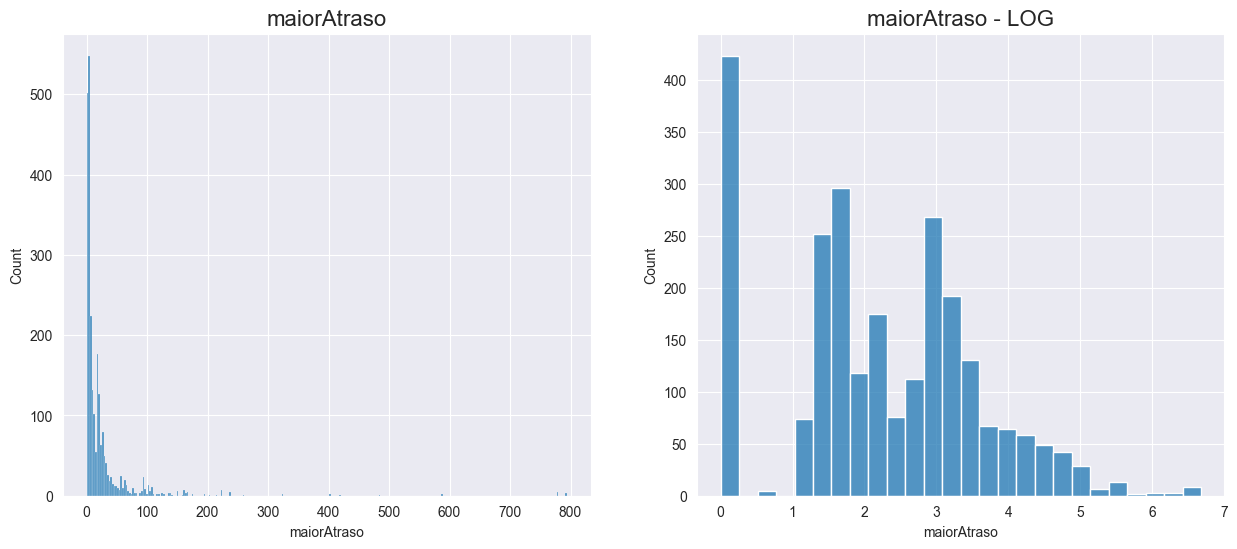

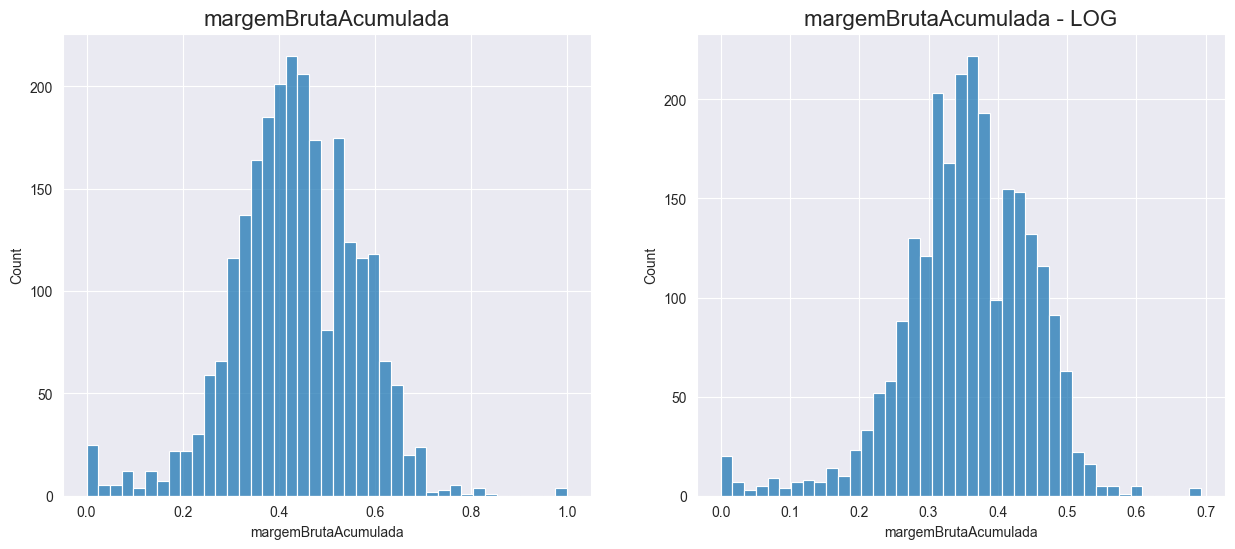

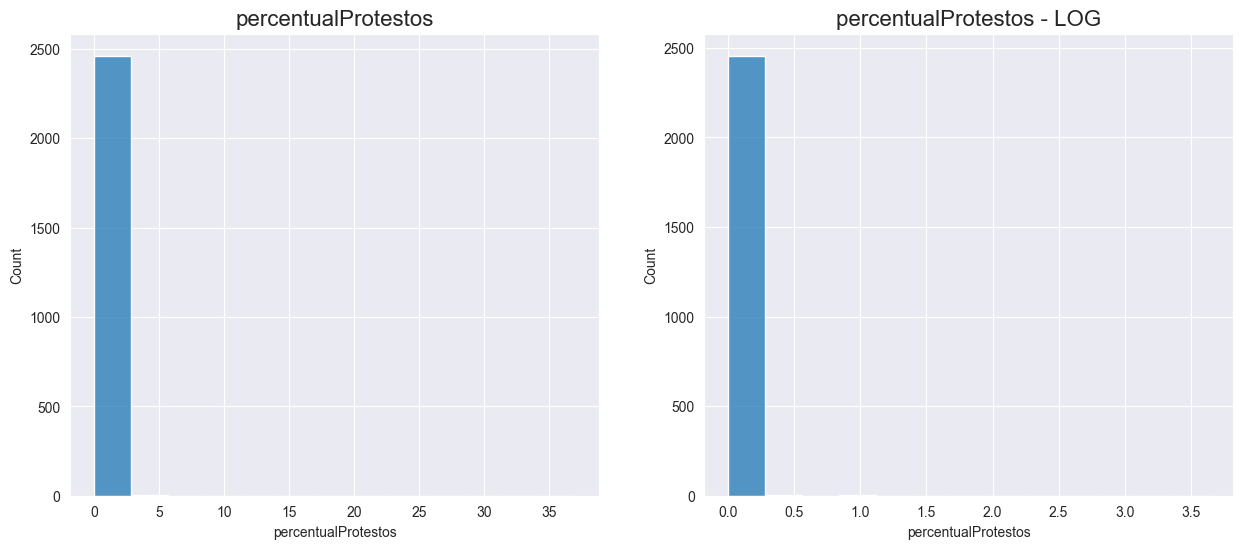

In [55]:
for column in columns_to_plot[0]:
    create_subplots(group_s_v2, column, column)

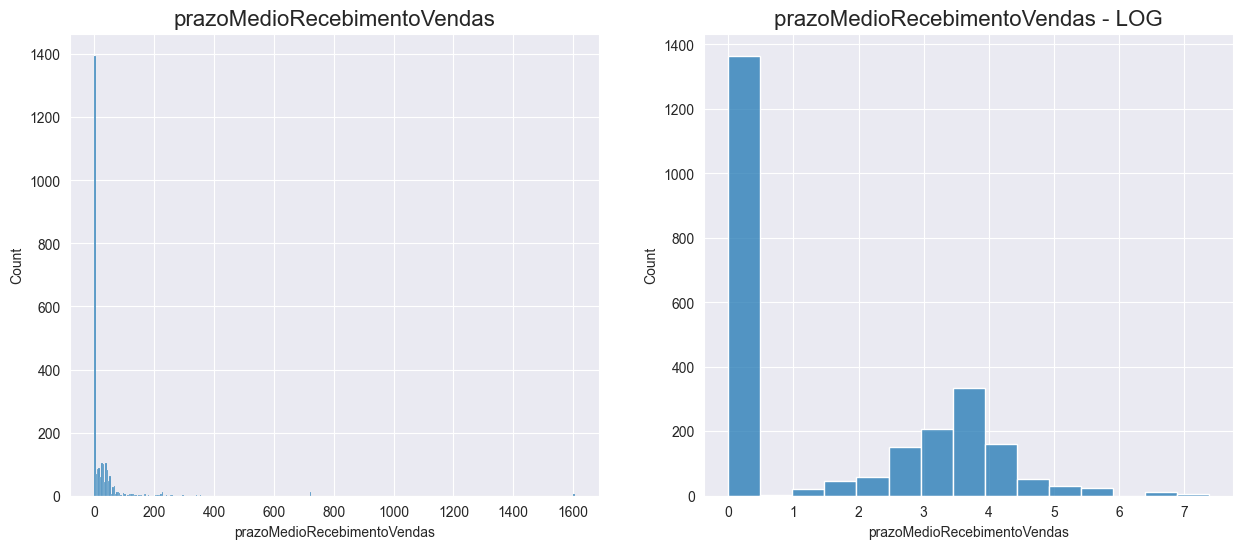

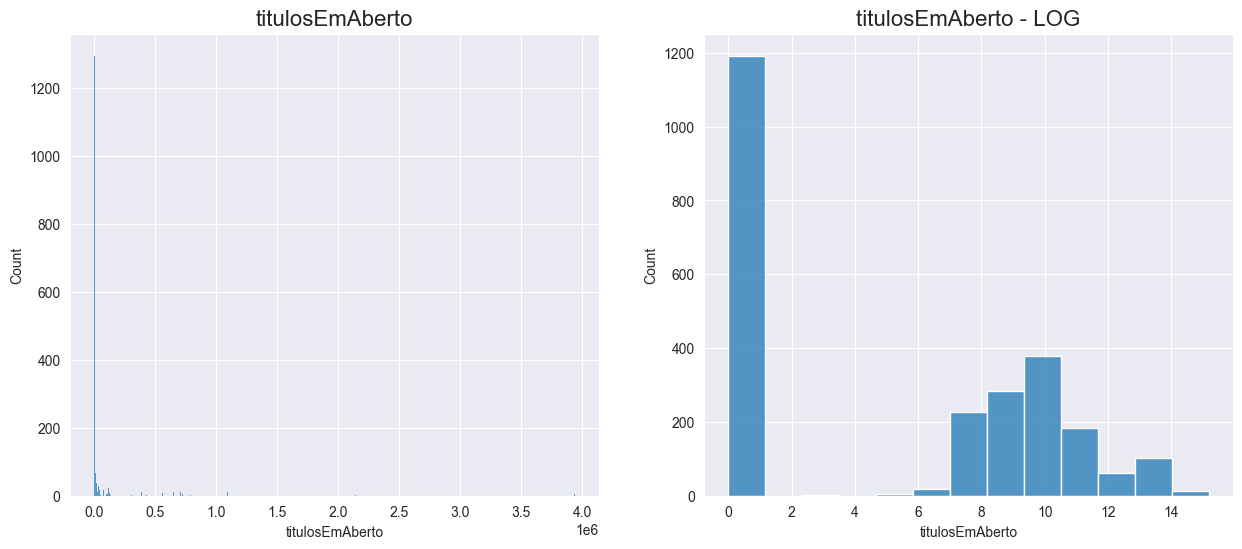

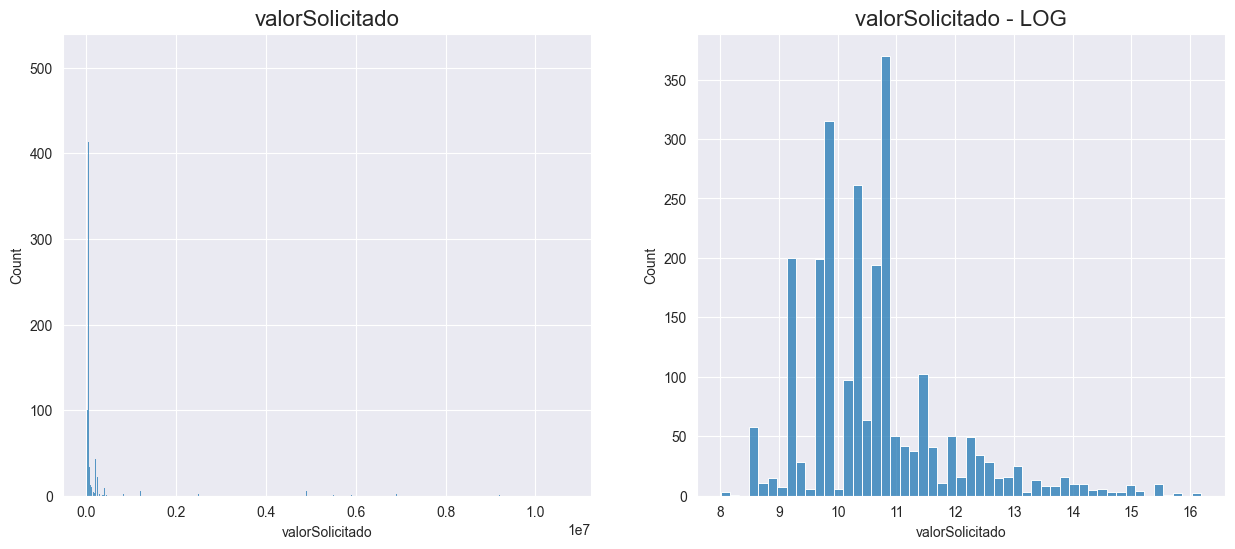

In [56]:
for column in columns_to_plot[1]:
    create_subplots(group_s_v2, column, column)

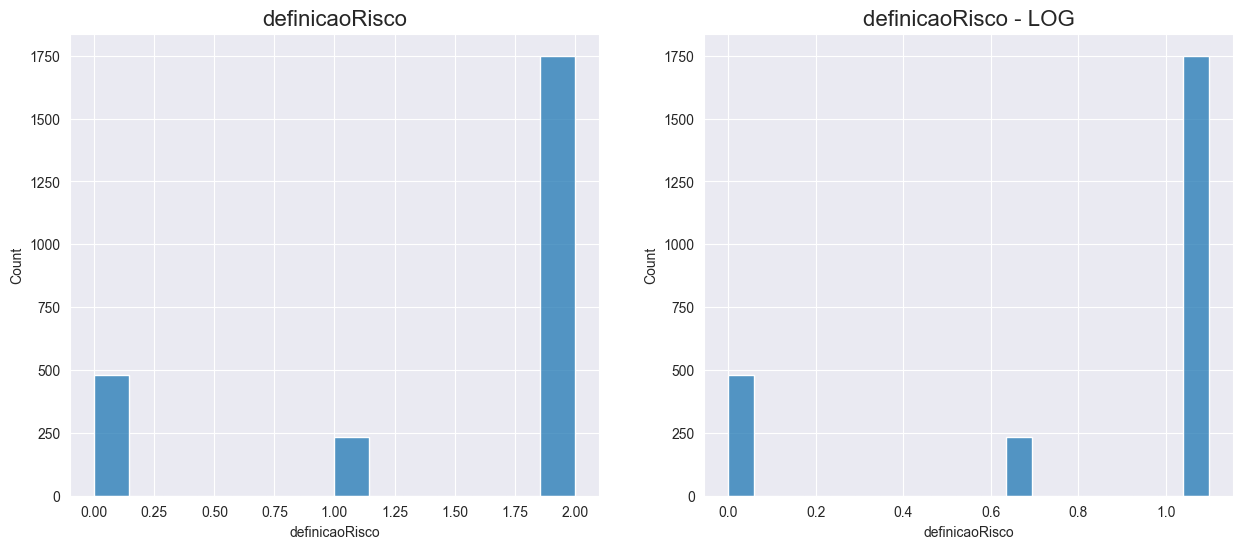

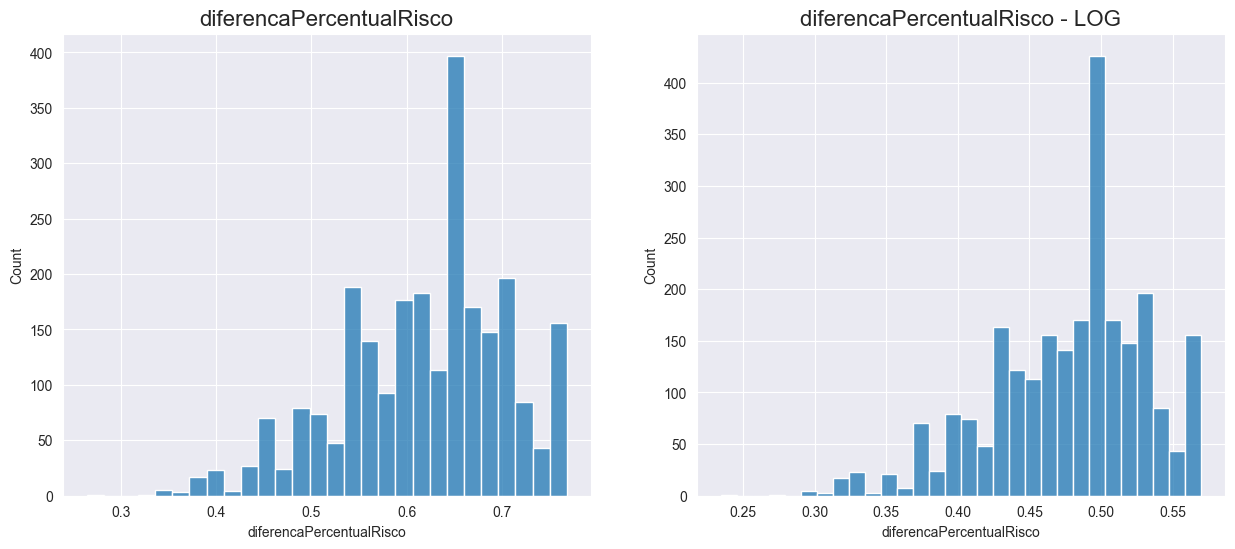

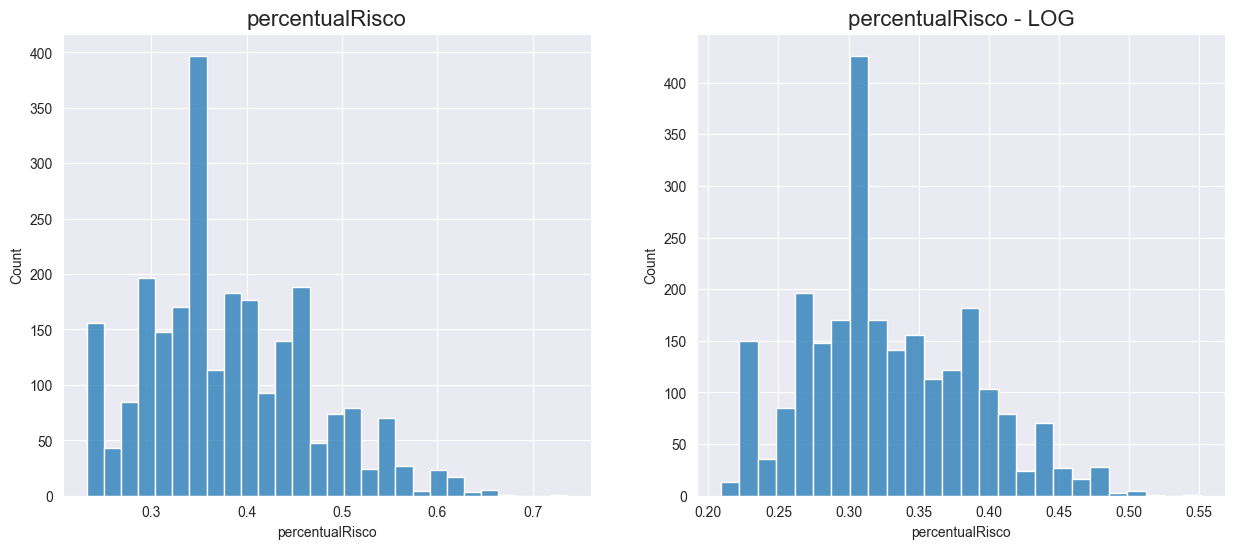

In [57]:
for column in columns_to_plot[2]:
    create_subplots(group_s_v2, column, column)

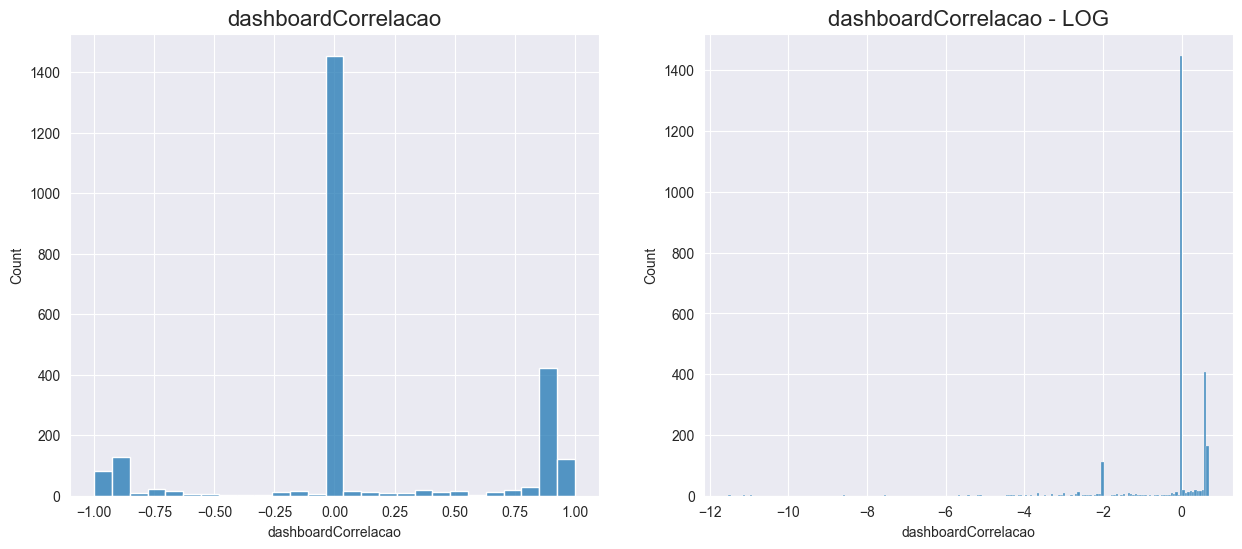

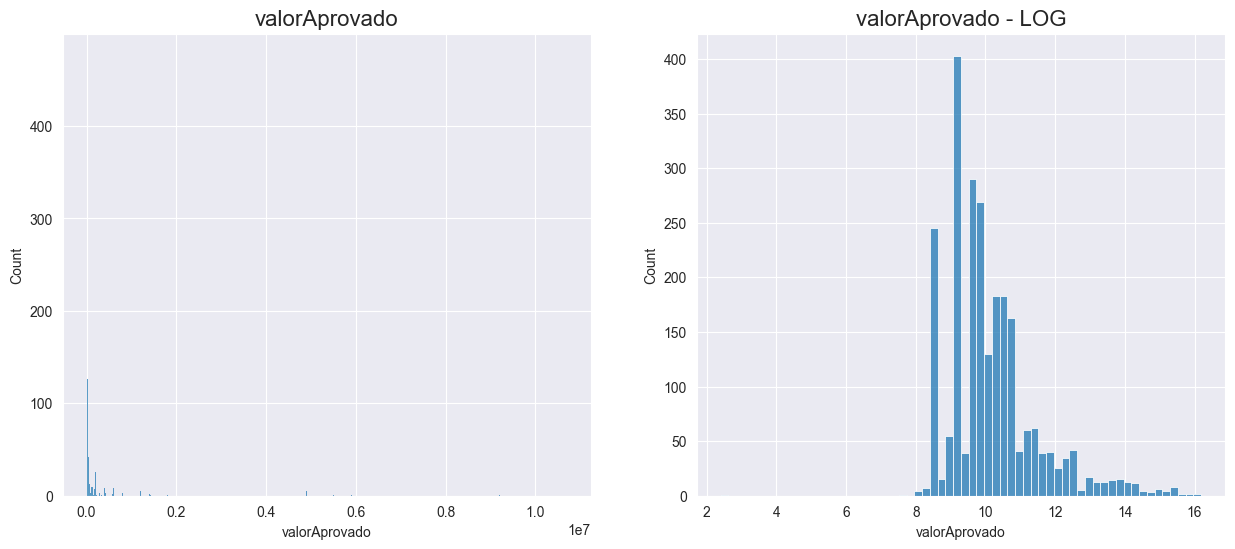

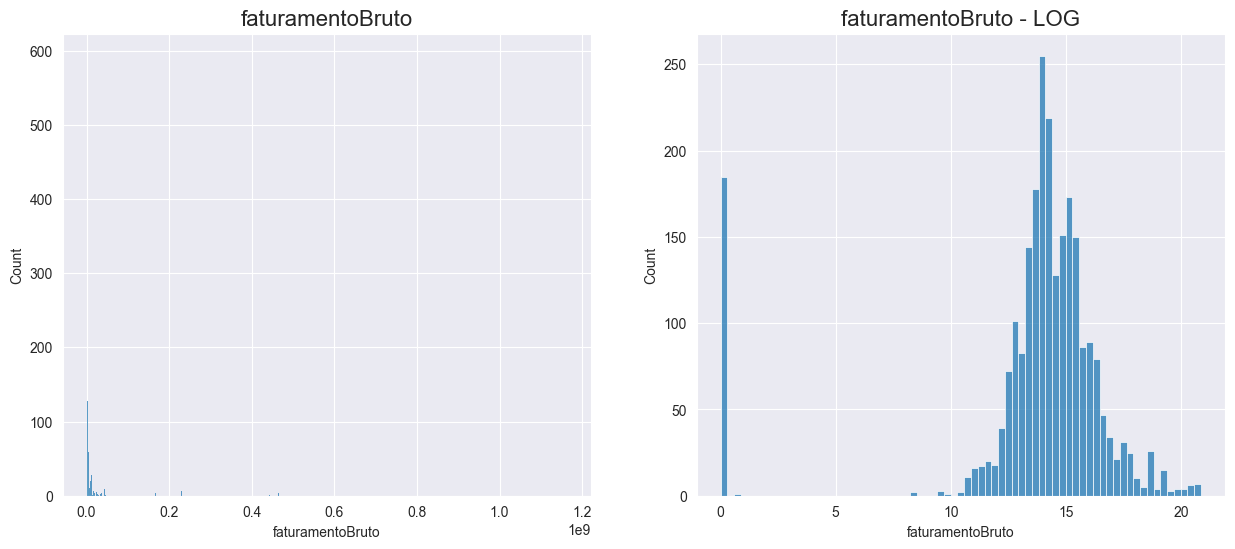

In [58]:
for column in columns_to_plot[3]:
    create_subplots(group_s_v2, column, column)

C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


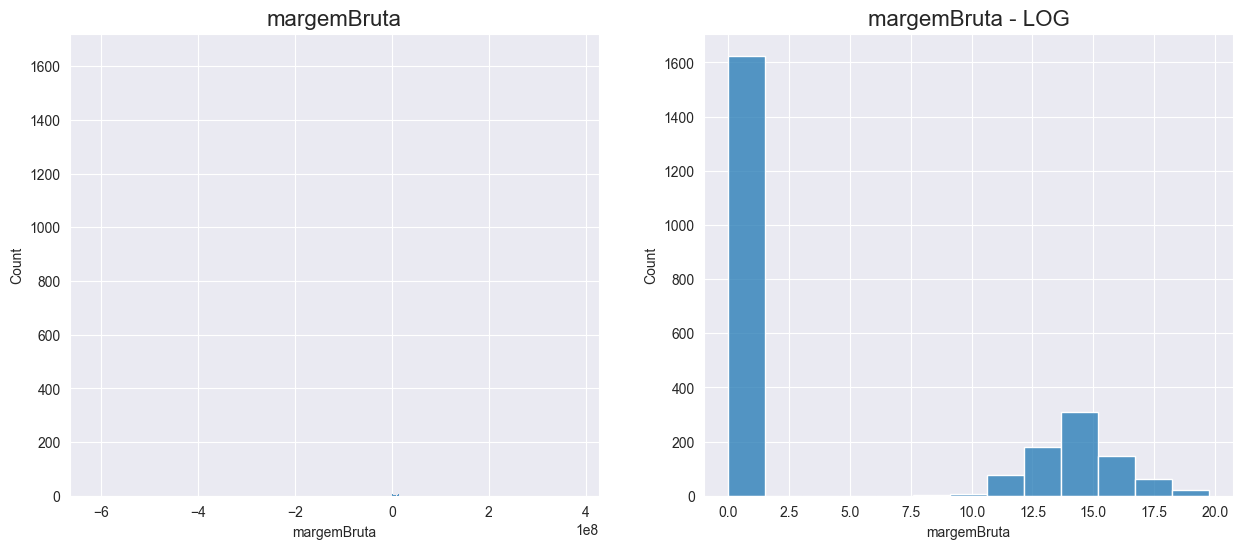

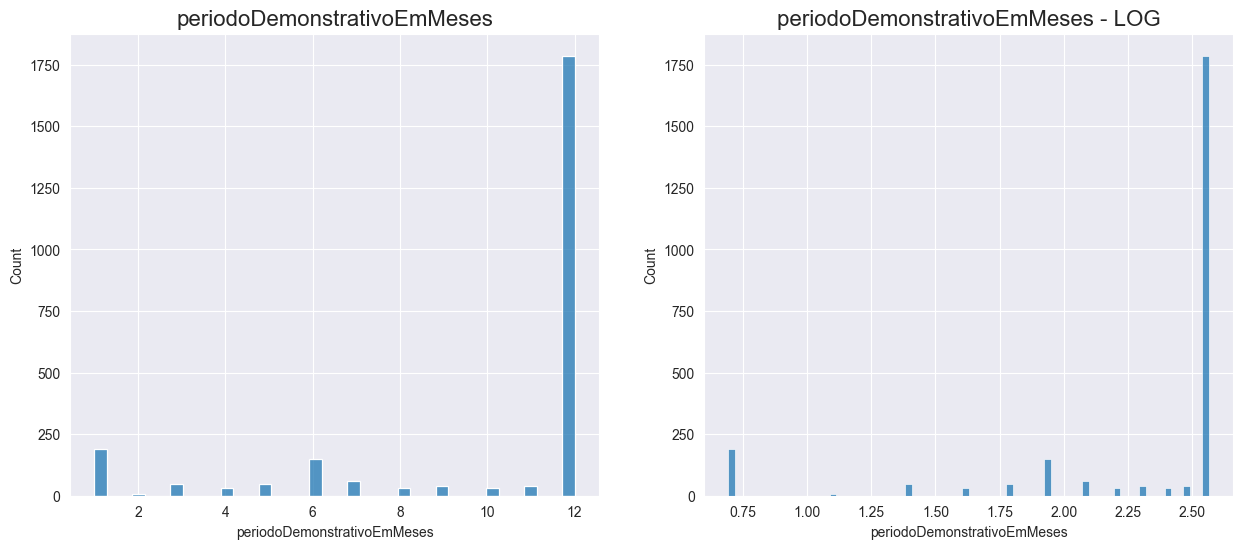

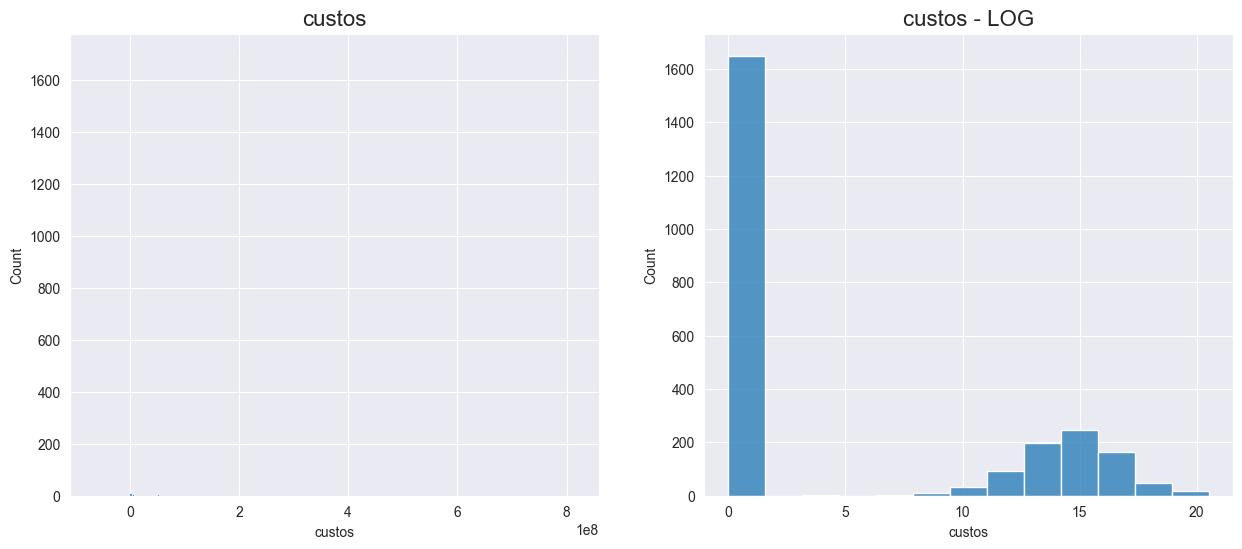

In [59]:
for column in columns_to_plot[4]:
    create_subplots(group_s_v2, column, column)

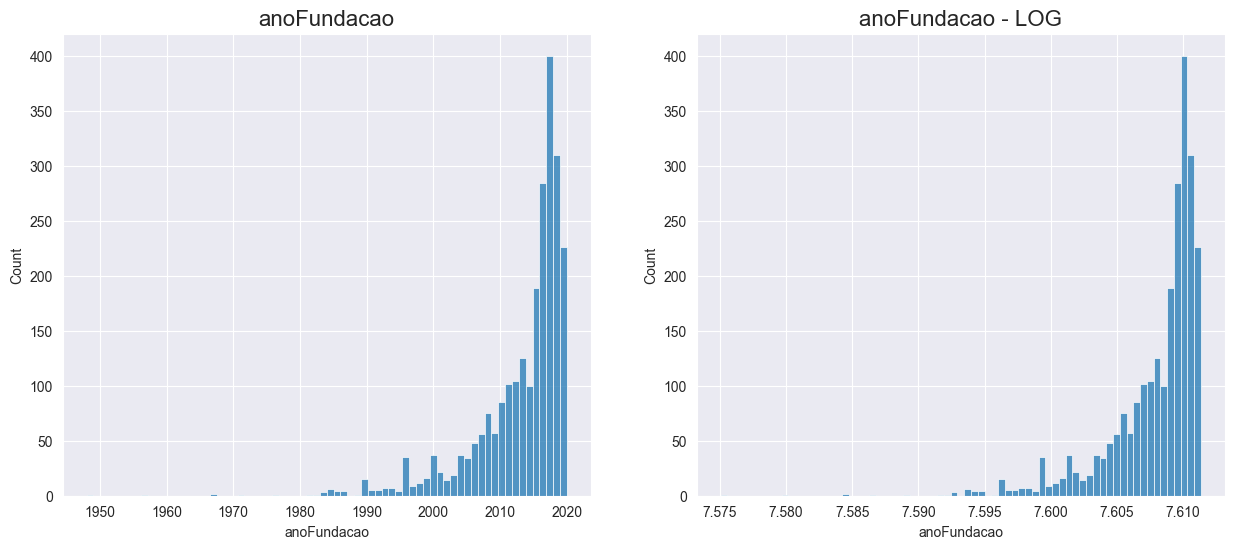

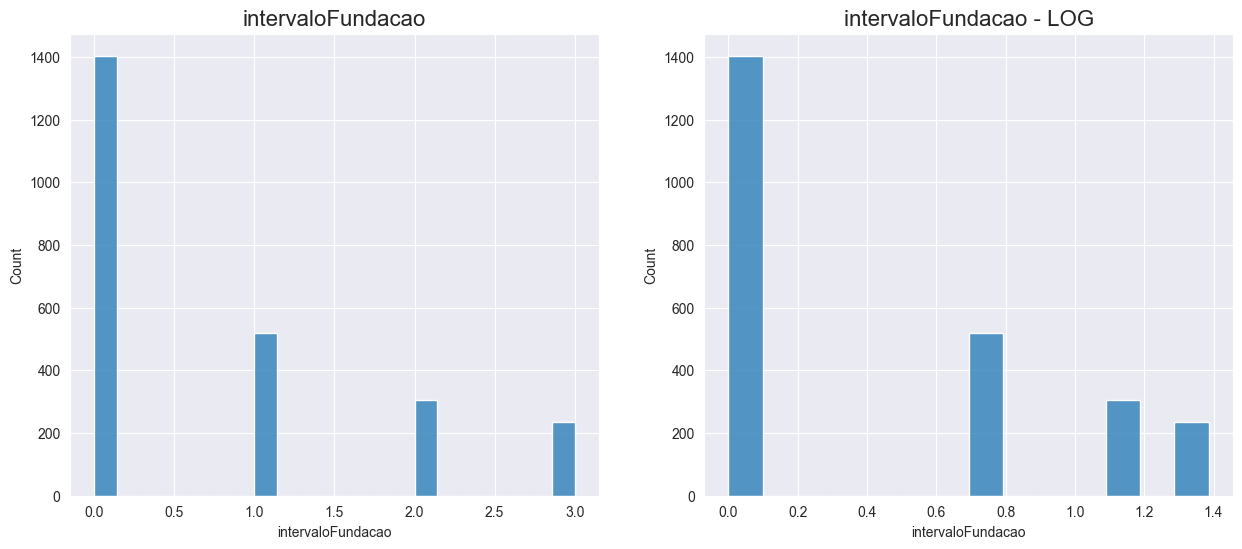

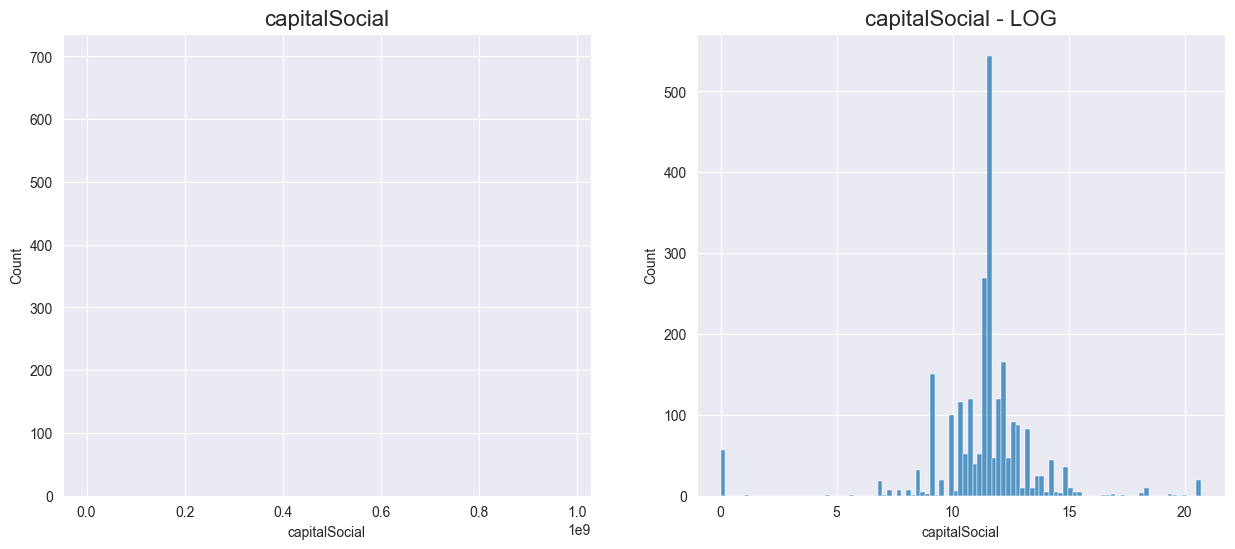

In [61]:
for column in columns_to_plot[5]:
    create_subplots(group_s_v2, column, column)

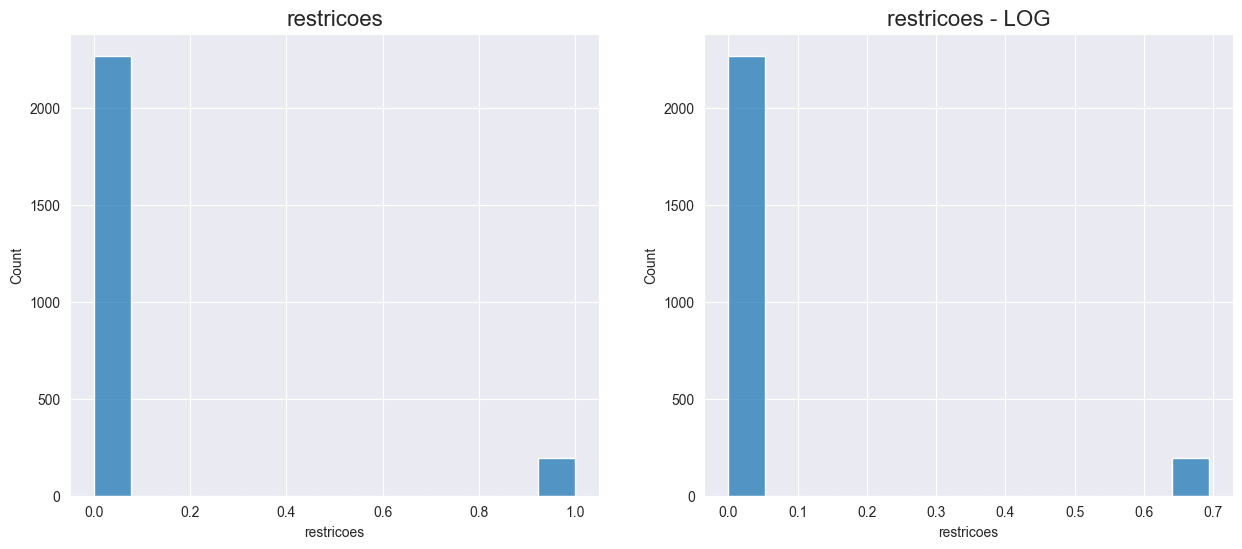

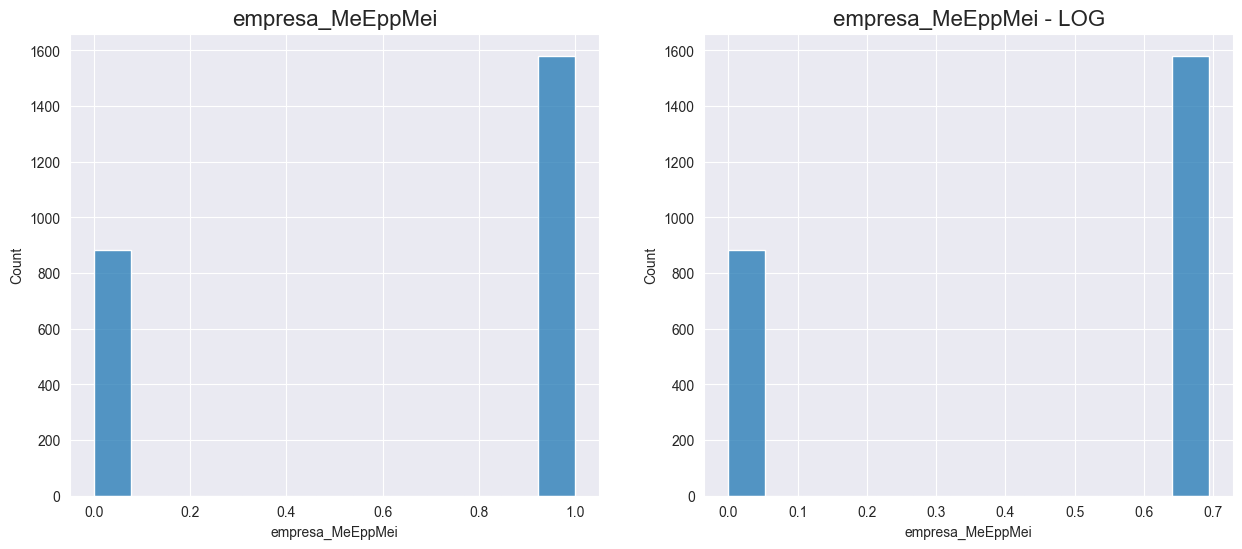

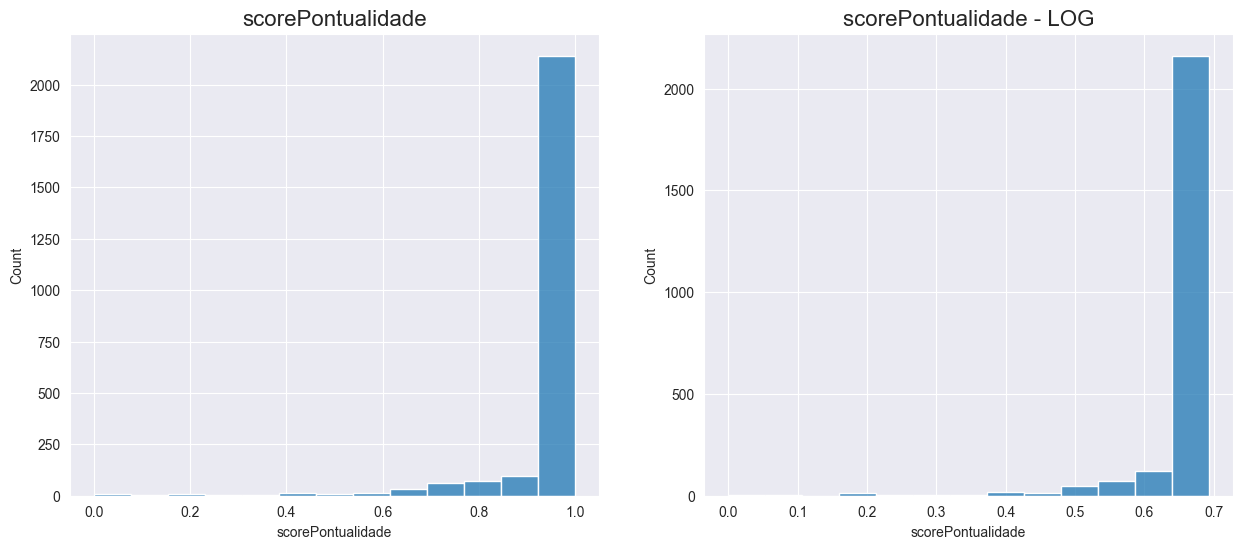

In [64]:
for column in columns_to_plot[6]:
    create_subplots(group_s_v2, column, column)

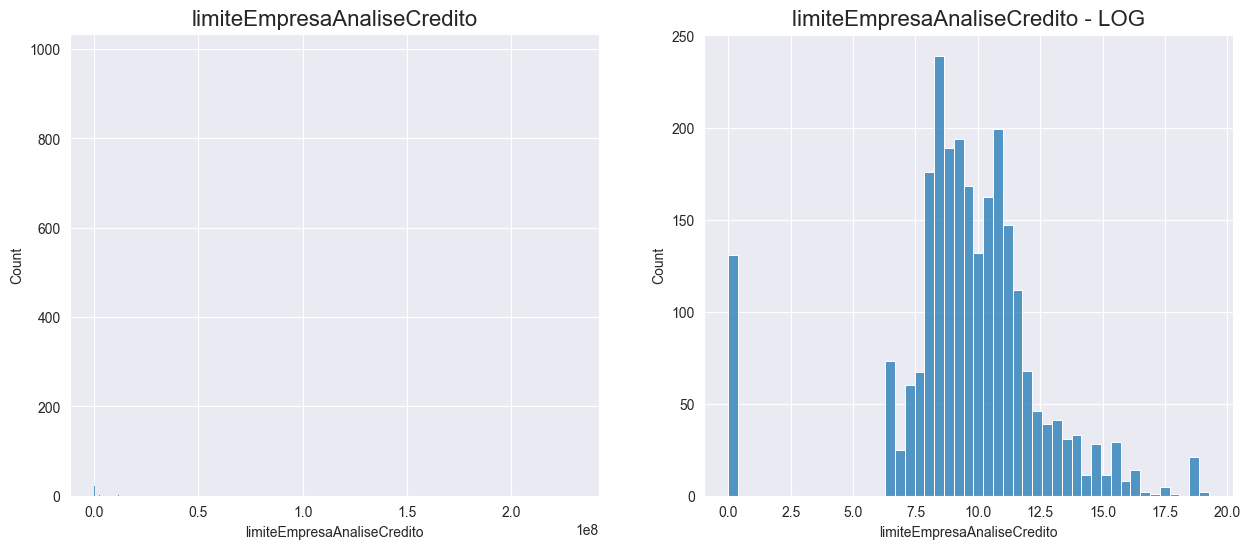

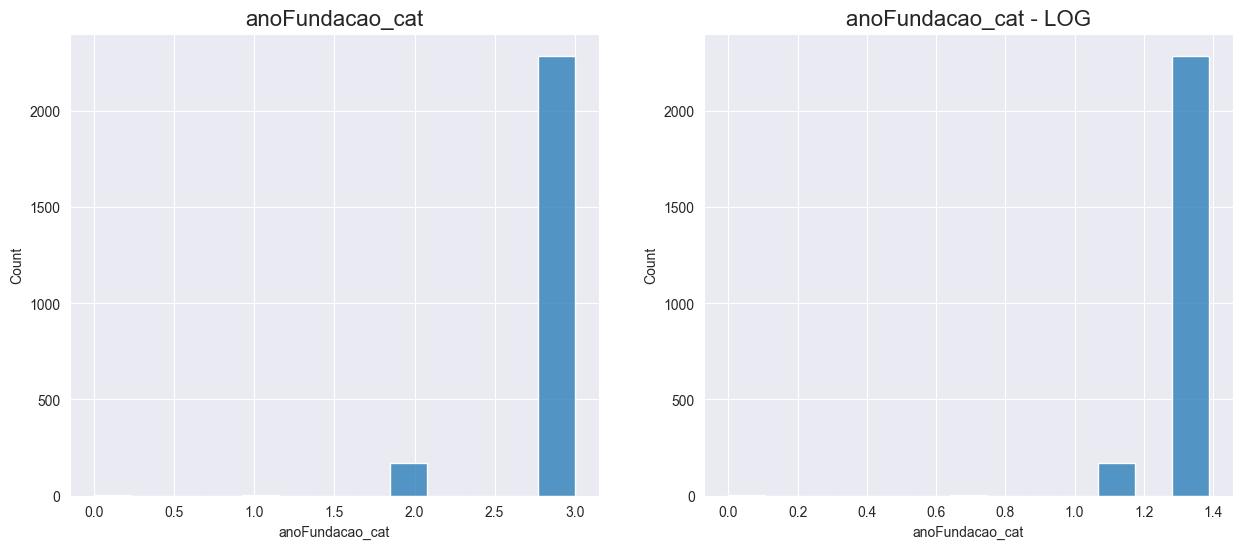

In [77]:
for column in columns_to_plot[7]:
    if column != 'group':
        create_subplots(group_s_v2, column, column)

In [30]:
# A distribuição das variáveis ficam muito mais próximas de uma distribuição normal 
#quando utilizado uma transformação logaritmica

### Analisando correlação das variáveis
df_group_s_correlation = group_s_v2.dropna()
df_group_s_correlation = df_group_s_correlation.corr()
## A partir disso vou criar um dataset transformado para analisar a correlacao
df_log_group_s_correlation = np.log(group_s_v2.copy().select_dtypes('number').dropna())
df_log_group_s_correlation = df_log_group_s_correlation.corr()

C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Dataframe SEM transformação')

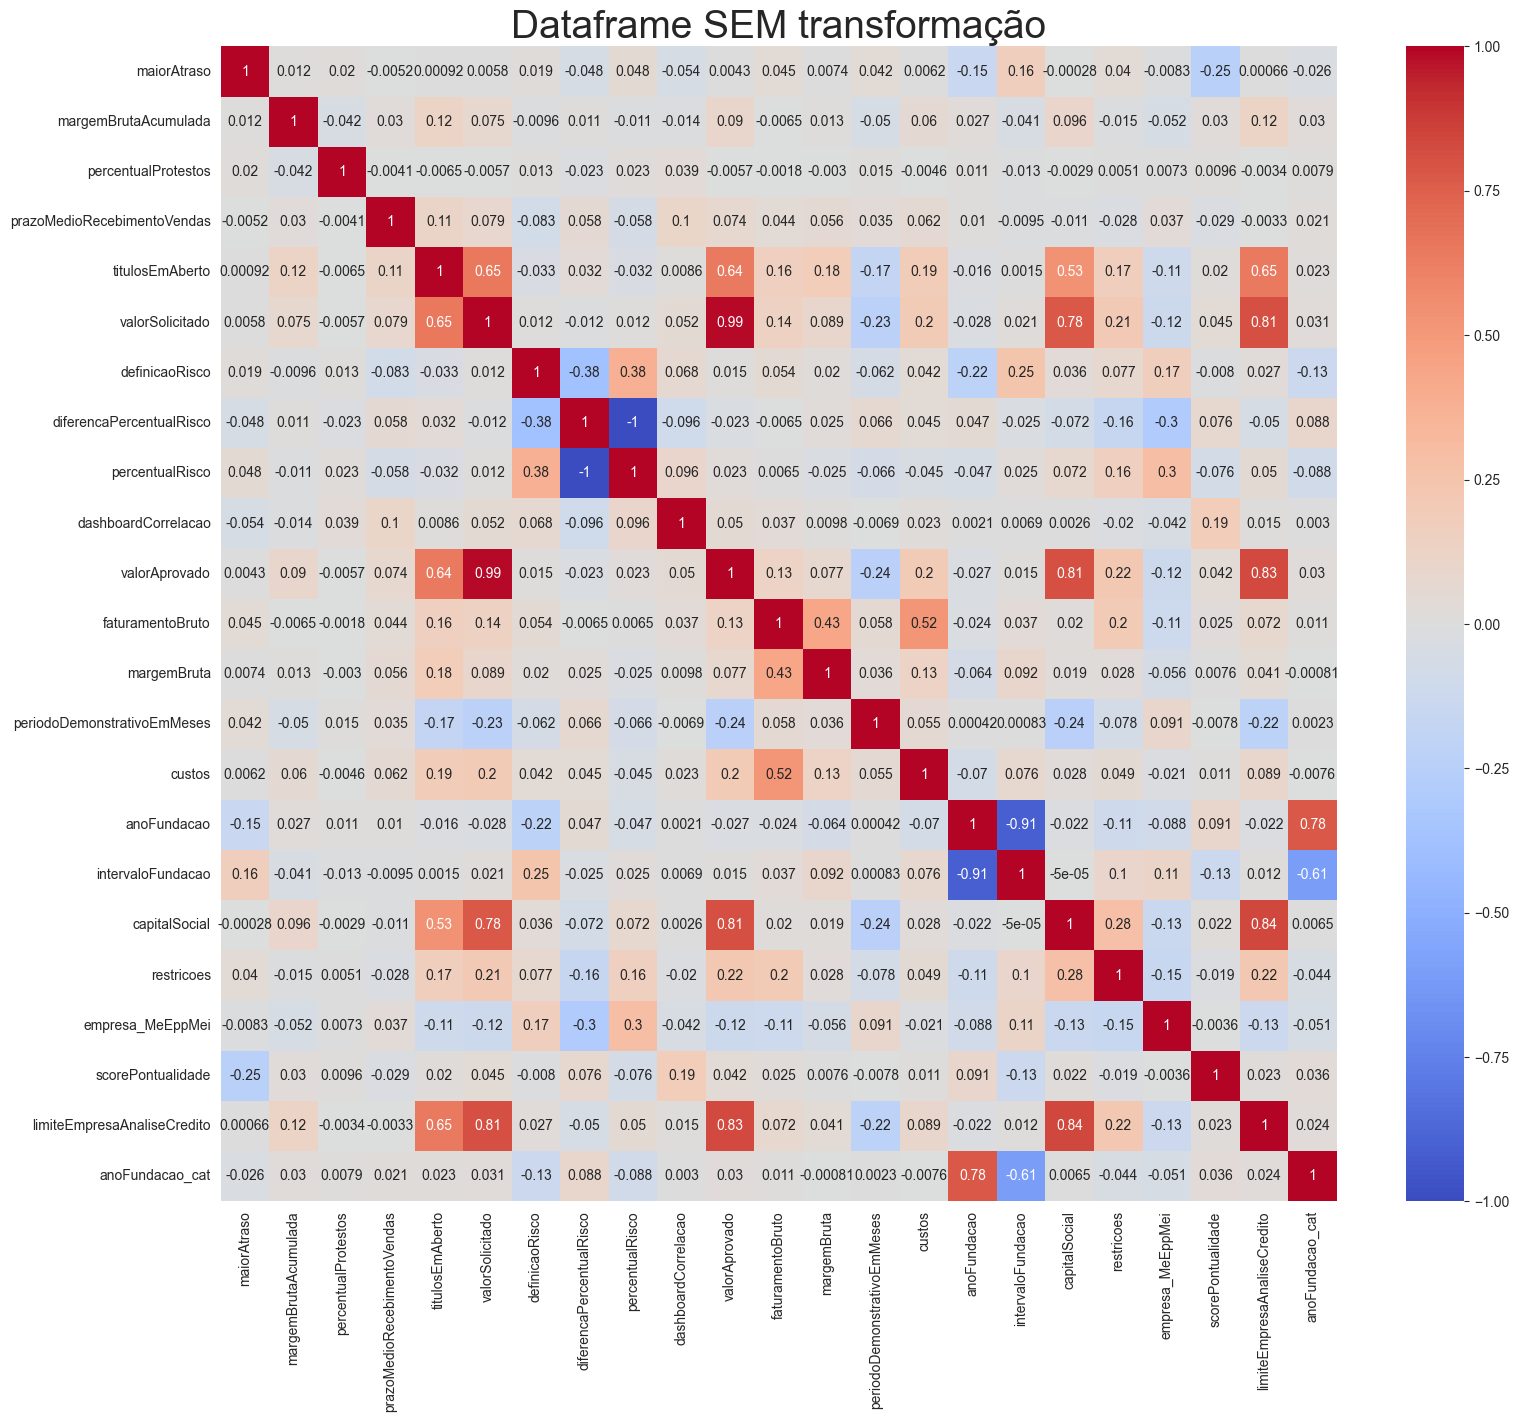

In [31]:
## Heatmap de correlações
plt.figure(figsize=(18, 15))
sns.heatmap(df_group_s_correlation, annot=True, cmap='coolwarm')
plt.title('Dataframe SEM transformação', fontdict={'fontsize': 28})

Text(0.5, 1.0, 'Dataframe COM transformação')

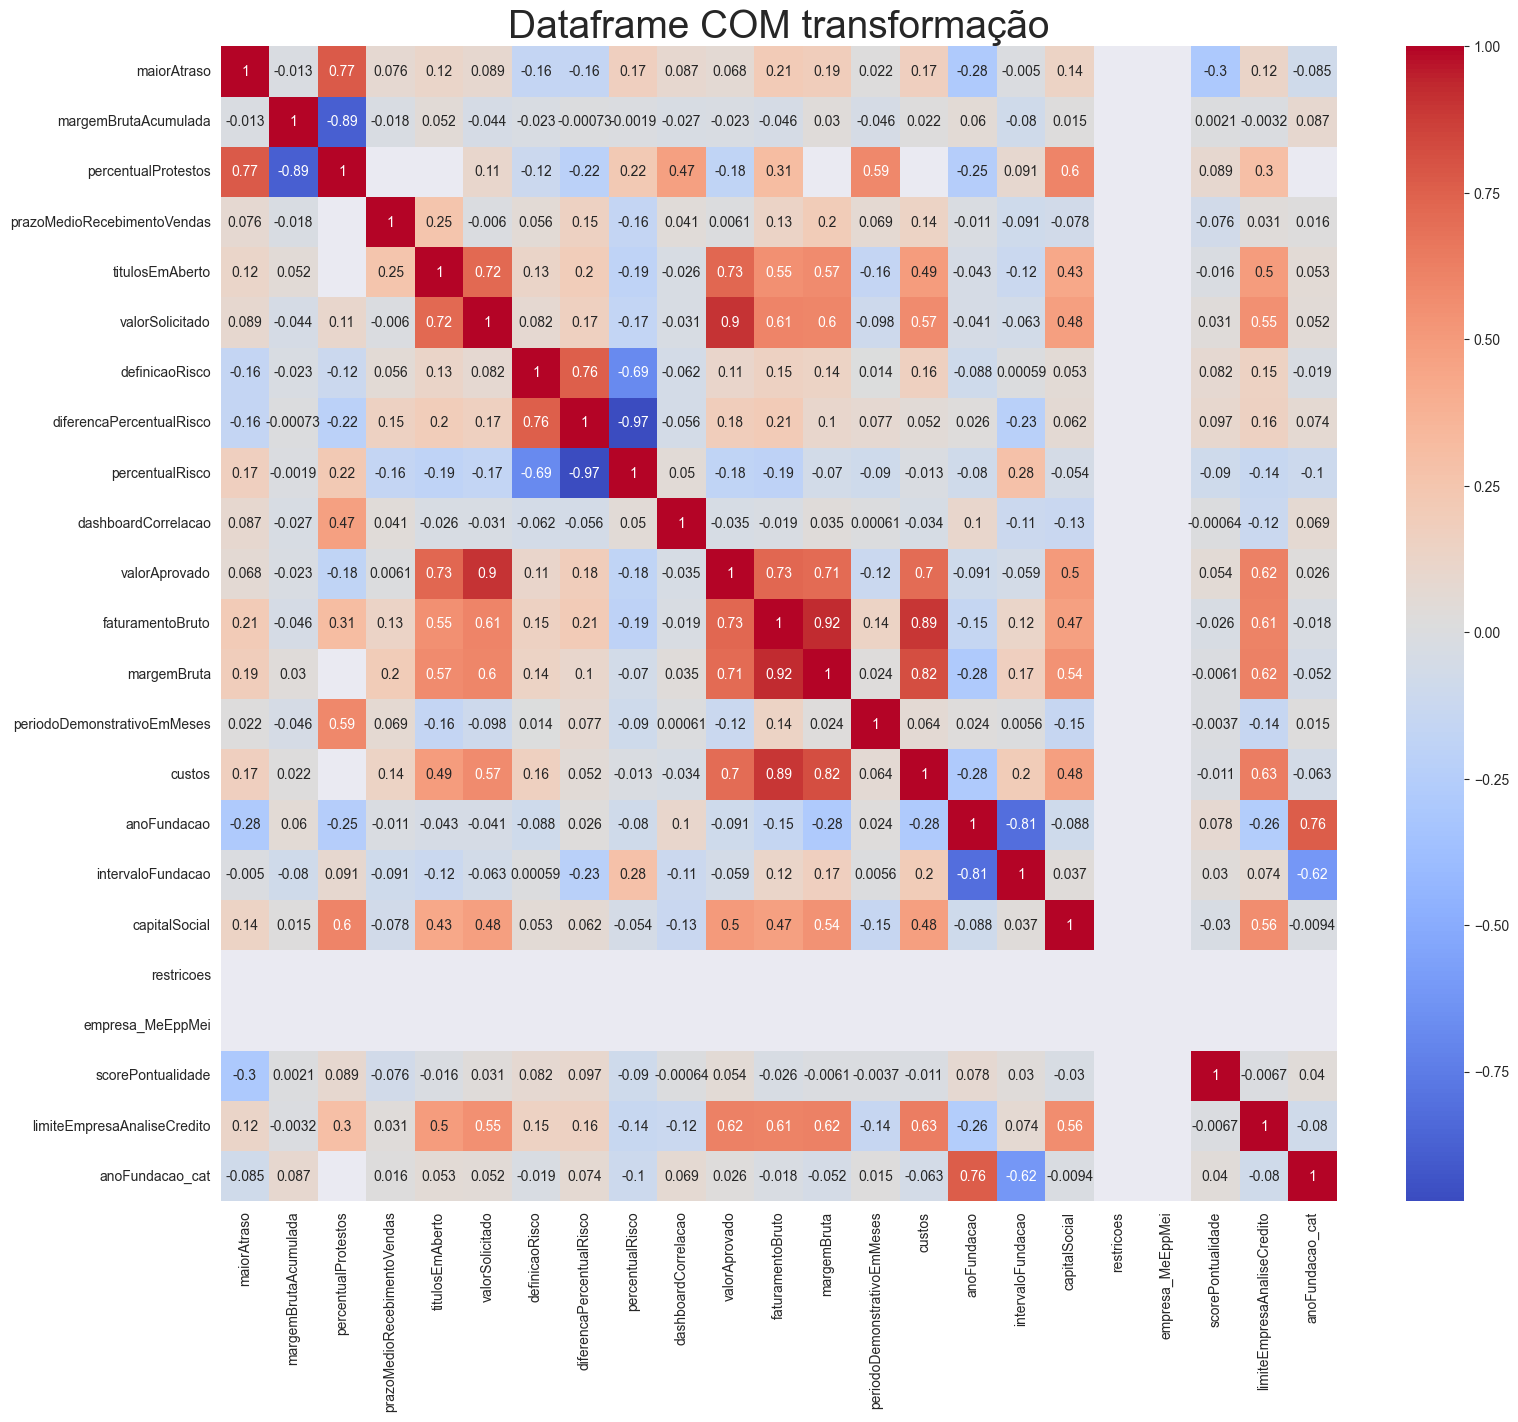

In [85]:
## Heatmap de correlações
plt.figure(figsize=(18, 15))
sns.heatmap(df_log_group_s_correlation, annot=True, cmap='coolwarm')
plt.title('Dataframe COM transformação', fontdict={'fontsize': 28})

In [ ]:
## Com a transformação, foi possível encontrar muito mais correlações entre as features

# TODO: Testar com uma série de combinações das features que são altamente correlacionadas

In [355]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

columnsToTest = [
    'faturamentoBruto', 'periodoDemonstrativoEmMeses',
    'limiteEmpresaAnaliseCredito', 'titulosEmAberto',
    'valorSolicitado', 'valorAprovado', 'capitalSocial'
]

#'percentualRisco'

df_model1 = group_s_v2[columnsToTest]
# Agora com as variáveis selecionadas, é necessário aplicar uma última limpeza nesses dados
## Colunas sem o valor Aprovado serão dropadas, pois não queremos inputar o valor da variável resposta
df_model1 = df_model1.dropna(subset=['valorAprovado'])

In [356]:
df_model1.describe()

,faturamentoBruto,periodoDemonstrativoEmMeses,limiteEmpresaAnaliseCredito,titulosEmAberto,valorSolicitado,valorAprovado,capitalSocial
count,2.979000e+03,2979.000000,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03
mean,1.496632e+07,10.030211,1.635432e+06,4.509765e+04,1.564368e+05,1.303871e+05,8.915318e+06
std,7.266483e+07,3.603561,1.377319e+07,2.234409e+05,5.651685e+05,5.456790e+05,8.338275e+07
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,2.500000e+03,1.000000e+01,0.000000e+00
25%,5.932705e+05,10.000000,4.400000e+03,0.000000e+00,2.000000e+04,1.000000e+04,5.000000e+04
50%,1.508751e+06,12.000000,1.458000e+04,0.000000e+00,3.500000e+04,2.000000e+04,1.000000e+05
75%,4.717218e+06,12.000000,6.600000e+04,1.080158e+04,6.000000e+04,4.600000e+04,2.000000e+05
max,1.163121e+09,12.000000,2.867581e+08,3.938590e+06,1.070000e+07,1.070000e+07,9.799574e+08


In [357]:
df_model1 = np.log(df_model1.dropna() + 1)


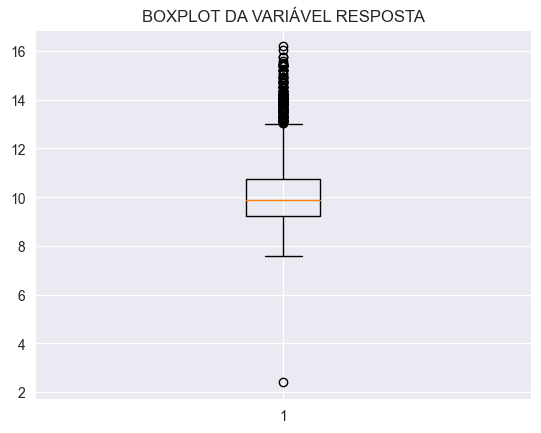

In [358]:
plt.title('BOXPLOT DA VARIÁVEL RESPOSTA')
plt.boxplot(df_model1['valorAprovado'])
plt.show()

# Opitei por remover a menor variável que está isolada e pode atrapalhar a avaliação do modelo,
# as que estiverem com o valor acima de 15.8 > Defini com análise gráfica e resultados do modelo

In [359]:
list(df_model1[df_model1['valorAprovado'] == df_model1['valorAprovado'].min()].index)

[5381]

In [360]:
df_model1.reset_index(drop=True, inplace=True)
index_to_drop = list(df_model1[df_model1['valorAprovado'] == df_model1['valorAprovado'].min()].index)
df_model1 = df_model1.drop(index_to_drop).reset_index(drop=True)

# Separação treino e teste

In [361]:
X = df_model1.drop('valorAprovado', axis=1)
y = df_model1['valorAprovado']

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=42,
                                                   )

x_train_with_constant = sm.add_constant(x_train)
x_train_with_constant

,const,faturamentoBruto,periodoDemonstrativoEmMeses,limiteEmpresaAnaliseCredito,titulosEmAberto,valorSolicitado,capitalSocial
2809,1.0,13.845929,2.564949,9.998843,0.000000,10.714440,11.512935
1559,1.0,13.831861,2.564949,9.049115,0.000000,10.596660,11.407576
509,1.0,12.520453,2.564949,8.594339,0.000000,9.546884,11.512935
2046,1.0,14.736024,2.564949,8.389587,10.291162,11.156265,11.918397
1830,1.0,15.033807,2.564949,11.662216,0.000000,10.126671,11.407576
...,...,...,...,...,...,...,...
1638,1.0,14.799704,2.564949,9.082621,0.000000,9.615872,0.000000
1095,1.0,16.026228,2.564949,11.005444,11.931883,11.512935,12.206078
1130,1.0,13.116283,2.564949,7.300473,0.000000,9.903538,9.903538
1294,1.0,18.745858,2.564949,16.328581,10.603960,14.220976,13.815512


<AxesSubplot: xlabel='valorAprovado', ylabel='Count'>

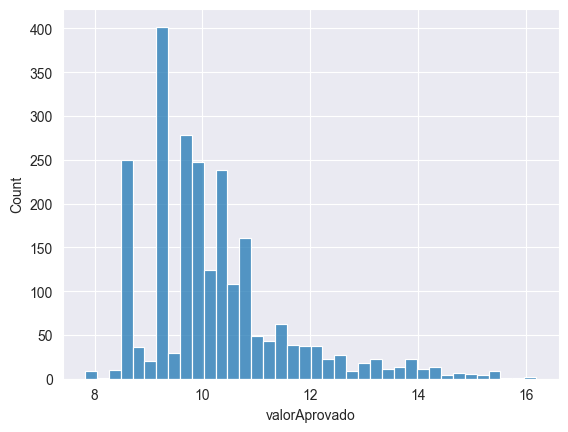

In [362]:
sns.histplot(y_train)

<AxesSubplot: xlabel='valorAprovado', ylabel='Count'>

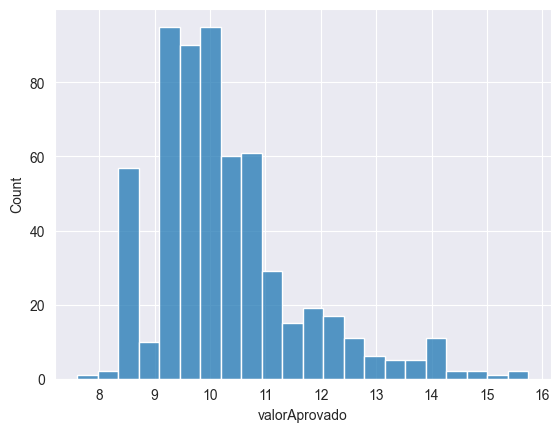

In [363]:
sns.histplot(y_test)

In [364]:
statsmodels_model = sm.OLS(y_train, x_train_with_constant, hasconst=True).fit()
statsmodels_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valorAprovado   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2263.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:22:45   Log-Likelihood:                -1845.3
No. Observations:                2382   AIC:                             3705.
Df Residuals:                    2375   BIC:                             3745.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.5573      0.116      4.788      0.000       0.329       0.786
faturamentoBruto                0.0481      0.004     11.213      0.000       0.040       0.056
periodoDemonstrativoEmMeses    -0.3949      0.033    -12.083      0.000      -0.459      -0.331
limiteEmpresaAnaliseCredito     0.0313      0.004      8.377      0.000       0.024       0.039
titulosEmAberto                 0.0148      0.002      6.271      0.000       0.010       0.019
valorSolicitado                 0.8647      0.010     84.193      0.000       0.845       0.885
capitalSocial                   0.0301      0.005      6.158      0.000       0.021       0.040
==============================================================================
Omnibus:                      424.066   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.444
Skew:                          -0.729   Prob(JB):                         0.00
Kurtosis:                       7.604   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
x_train

,faturamentoBruto,periodoDemonstrativoEmMeses,limiteEmpresaAnaliseCredito,titulosEmAberto,valorSolicitado,capitalSocial
2809,13.845929,2.564949,9.998843,0.000000,10.714440,11.512935
1559,13.831861,2.564949,9.049115,0.000000,10.596660,11.407576
509,12.520453,2.564949,8.594339,0.000000,9.546884,11.512935
2046,14.736024,2.564949,8.389587,10.291162,11.156265,11.918397
1830,15.033807,2.564949,11.662216,0.000000,10.126671,11.407576
...,...,...,...,...,...,...
1638,14.799704,2.564949,9.082621,0.000000,9.615872,0.000000
1095,16.026228,2.564949,11.005444,11.931883,11.512935,12.206078
1130,13.116283,2.564949,7.300473,0.000000,9.903538,9.903538
1294,18.745858,2.564949,16.328581,10.603960,14.220976,13.815512


In [366]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [367]:
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_train)
preds_sm = statsmodels_model.predict(x_train_with_constant)

In [368]:
def takes_metric_values(v_true, v_pred):
    v_true = np.exp(v_true)
    v_pred = np.exp(v_pred)
    
    r2 = r2_score(v_true, v_pred)
    mse = mean_squared_error(v_true, v_pred)
    mae = mean_absolute_error(v_true, v_pred)
    mape = mean_absolute_percentage_error(v_true, v_pred)
    
    print(f'''
        R² >>>> {r2}
        MSE >>>> {mse}
        MAE >>>> {mae}
        MAPE >>>> {mape}
    ''')
    
'''
Eu também analisei os valores dessas metricas com os valores transformados, porém resolvi deixar no dataset apenas as 
variáveis não transformadas.
'''

'\nEu também analisei os valores dessas metricas com os valores transformados, porém resolvi deixar no dataset apenas as \nvariáveis não transformadas.\n'

In [369]:
takes_metric_values(y_train, preds)


        R² >>>> 0.83583122078999
        MSE >>>> 52004632794.815765
        MAE >>>> 45795.34702333844
        MAPE >>>> 0.5034708828648683
    


In [370]:
preds_test = lr.predict(x_test)
takes_metric_values(y_test, preds_test)


        R² >>>> 0.849399302108168
        MSE >>>> 33380589619.21853
        MAE >>>> 43514.358758537164
        MAPE >>>> 0.4505807723064066
    


# Análise visual dos resultados
---

In [371]:
train_residues = y_train - preds

In [372]:
def plot_residues_distribution(residues):
    sns.displot(residues, kde=True)
    plt.title('Distribuição dos resíduos', fontdict={'fontsize': 16})
    plt.xlabel('Valor Aprovado - LOG', fontdict={'fontsize': 12})
    plt.show()

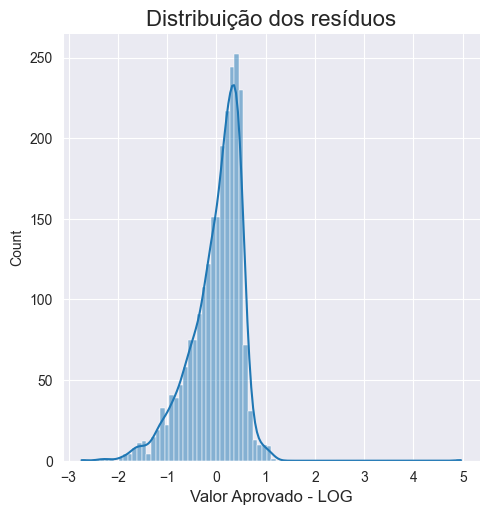

In [373]:
plot_residues_distribution(train_residues)

In [374]:
def plot_regression_result(y_true, y):
    sns.scatterplot(x=y, y=y_true)
    plt.plot(y_true, y_true, color='red', label='Regressão perfeita')
    plt.title('Predições de treino x Valor Real', fontdict={'fontsize': 16})
    plt.xlabel('Valores Preditos', fontdict={'fontsize': 12})
    plt.ylabel('Valores Reais', fontdict={'fontsize': 12})
    plt.legend()
    plt.show()

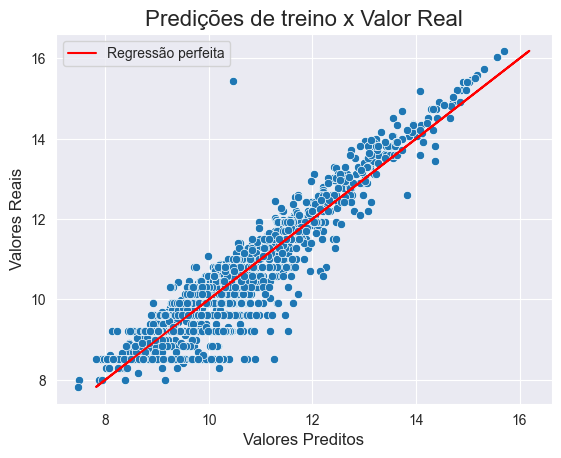

In [375]:
plot_regression_result(y_train, preds)

## Testando KNN Regressor

In [376]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3, metric='euclidean', n_jobs=-1)
knn_regressor.fit(x_train, y_train)

knn_preds = knn_regressor.predict(x_train)

print('**********AVALIAÇÃO DE TREINO**********')
takes_metric_values(y_train, knn_preds)

**********AVALIAÇÃO DE TREINO**********

        R² >>>> 0.943103265031587
        MSE >>>> 18023486703.71212
        MAE >>>> 22441.781828361585
        MAPE >>>> 0.2552292609492821
    


In [377]:
knn_preds_test = knn_regressor.predict(x_test)
print('**********AVALIAÇÃO DE TESTE**********')
takes_metric_values(y_test, knn_preds_test)

**********AVALIAÇÃO DE TESTE**********

        R² >>>> 0.9413594225956649
        MSE >>>> 12997662539.21388
        MAE >>>> 32267.497621458922
        MAPE >>>> 0.3947594081424139
    


In [378]:
train_residues = y_train - knn_preds
test_residues = y_test - knn_preds_test

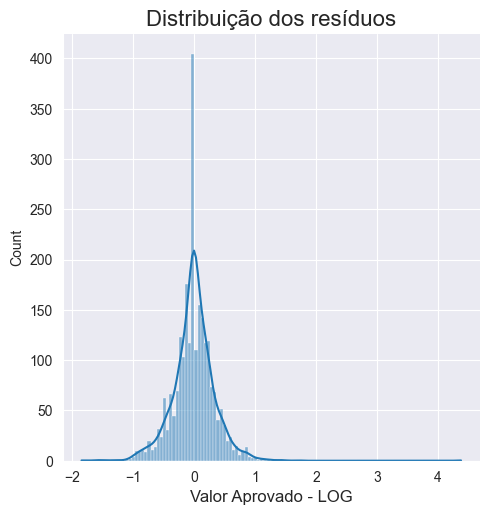

In [379]:
plot_residues_distribution(train_residues)

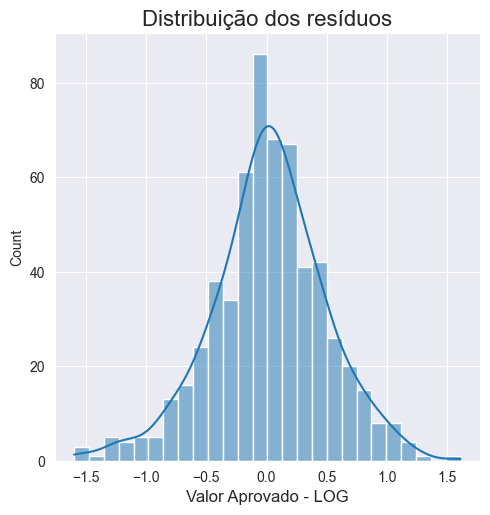

In [380]:
plot_residues_distribution(test_residues)

**********AVALIAÇÃO DE TREINO**********


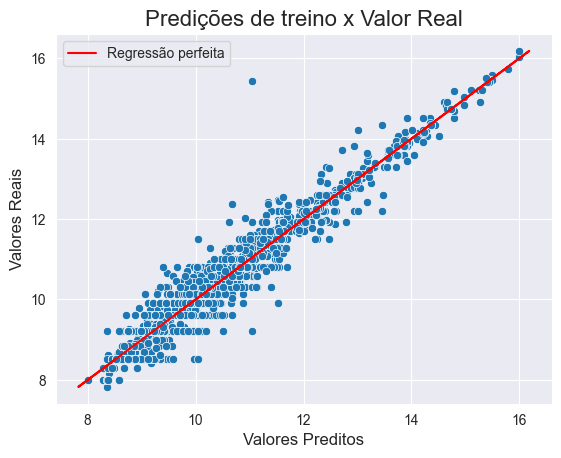

In [381]:
print('**********AVALIAÇÃO DE TREINO**********')
plot_regression_result(y_train, knn_preds)

**********AVALIAÇÃO DE TESTE**********


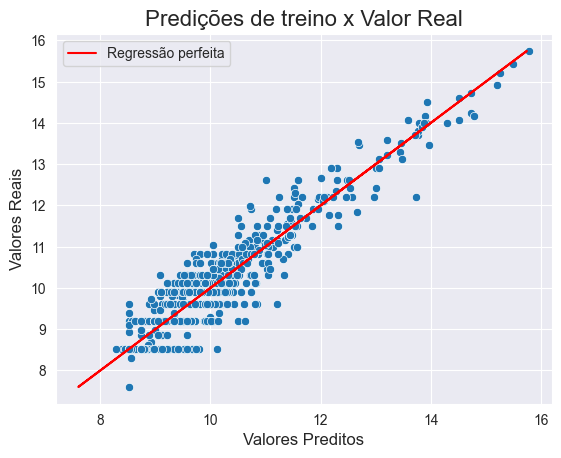

In [382]:
print('**********AVALIAÇÃO DE TESTE**********')
plot_regression_result(y_test, knn_preds_test)

In [383]:
new_fake_data = np.array(x_test.iloc[0]) + np.array([np.random.random() for i in range(6)])
knn_regressor.predict([new_fake_data])

C:\Users\vinic\.conda\envs\gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([13.75334459])

## Pensei testar com redes neurais porém, acho que é adicionar complexidade desnecessária já que o knn trouxe bons resultados (não possui métrica alvo).
---